<a href="https://colab.research.google.com/github/galacticism/Blind-Trading-Assistant/blob/main/WriteUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Quantum Supremacy: The Quantum Approximate Optimization Algorithm***

Physics 14N | Spring 2025

Authors: Chirag Maheshwari, Zeynep Eylül Yağcıoğlu, Sandeep Sethuraman, Sarang Goel


```

Table of Contents
___________________

Introduction:
1. Quantum Supremacy
2. Quantum Approximate Optimization Algorithm (QAOA)
3. Cost Hamiltonian

A) Weighted Max-Cut Problem
1. Introduction
1.1 Objective
1.2 Visual Intuition
1.3 Mathematical Representation of Cuts
1.4 Weighted Cost Function in Spin-Variable Form

2. Classical Max-Cut Algorithms
2.1. Brute-Force Enumeration (Direct Loop Over {0,1}𝑛)
Algorithm Overview
2.2. Hamiltonian Diagonalization (SparsePauliOp → Dense matrix)
2.3. Greedy Local Search (Bit-flip Heuristic with Gain Updates)

3. Quantum Max-Cut Algorithms
3.1. IBM Model
3.2. My Manual QAOA Circuit Construction

4. Comparison: Classical vs. Quantum
4.1. Runtime Scaling vs. Problem Size
4.2. Approximation Ratio vs. QAOA Depth
4.3. Logical Qubits vs. Problem Size

5. Final Evaluation and Conclusions

B) Traveling Salesman Problem


C) Graph Colouring Problem


D) Set Cover Problem


Bibliography

```





# Quantum Supremacy

Quantum supremacy is a milestone in the history of computer science. It is the phenomenon that a quantum computer can execute a computational task that is virtually impossible for a classical computer to accomplish in a reasonable timeframe, regardless of the usefulness of that particular task. This milestone does not mean that quantum computers are superior across all domains, but merely that they can outperform classical compputers in some problems.

The goal of quantum supremacy is not speculative. Quantum supremacy has significant implications for various industries—ranging from cryptography to drug discovery, material science, logistics, and beyond. Quantum supremacy must be demonstrated because it validates the operational computational advantages of quantum systems, guaranteeing the fundamental principles of quantum mechanics function in information processing. However, reaching this level is plagued with challenges, particularly because qubits are environmentally noise-sensitive, prone to decoherence, and having the problem of error correction.

One of the highlights in this area was Google's 2019 demonstration of a quantum supremacy, using its 53-qubit Sycamore processor. The quantum processor performed a specific sampling operation in 200 seconds that would take the world's best classical supercomputer about 10,000 years to accomplish. While the operation itself wasn't particularly useful, it was a historic moment. Such experiments open the door to useful quantum advantage on real problems such as optimization, simulation, and machine learning.

The comparison between classical and quantum techniques still reamins controversial as classical algorithms continue to improve and quantum hardware is still a fundamental limitation to running quantum algorithms. Moreover, quantum computing has a very specific niche where it is better than classical algorithms and it is important to figure out exaclty what these problems are.

# Quantum Approximate Optimization Algorithm (QAOA)


QAOA was introduced by Farhi, Goldstone, and Gutmann in their 2014 seminal paper, and it is a hybrid algorithm (utilizes both classical and quantum computation) to provide good approximations for combinatorics problems (mostly large-scale ones that take very long to solve exactly). QAOA works by evolving a quantum state with a cost Hamiltonian and mixer Hamiltonian function that are applied in sequence. The number of iterations of this process is given by *p*, the circuit depth which can greatly impact the accuracy of QAOA algorithms.

# Cost Hamiltonian


The Cost Hamiltonian is given as $$H_C = \sum_{z \in \{0,1\}^n} C(z) |z\rangle\langle z|
$$

where $\{0,1\}^n$ is the set of all $n$-bit binary strings (computational basis), $C(z)$ is the classical cost function for the given problem that we are using QAOA on, and $|z\rangle\langle z|$ projects onto the basis state $\langle z|$. $H_C$ is defined as a summation, so each $\langle z|$ has eigenvalue $C(z)$.

Then, $H_C$ acts on any state $|\psi\rangle$ by scaling each component of the computational basis (each $|\psi\rangle$ can be expressed as a linear combination of these, of course) by the $C(z)$ associated with that $\langle z|$.

In QAOA, the $H_C$ is used to define a unitary $e^{-i \gamma H_C}$ where $\gamma$ is a parameter that represents how much we rotate the quantum state based on the cost functions, or in other words, how much more weightage we give better solutions.

# Mixer Hamiltonian


The Mixer Hamiltonian is given as $$H_M = \sum_{i=1}^n X_i
$$
where $X_j$ is the Pauli-X operator acting on qubit $j$, and $n$ is the number of qubits being used in the problem.

Because of this, each Pauli-X acts on $|z\rangle$ by flipping the $j$-th bit of $z$, and as a result, $M_H$ creates superpositions of basis states by mixing bitstrings that differ by a single bit flip, and on any given state $|\psi\rangle$ it flips the bits of its components and redistributes amplitude among neighboring states that differ by a single bit.

In QAOA, the $H_M$ is used to define a unitary $e^{-i \beta H_M}$ where $\beta$ is a parameter that represents how much we redistribute the probability amplitudes among neighboring states (higher $\beta$ means we are less likely to get stuck in a local minimum).

# Circuit Depth (p)

$p$ represents the number of QAOA layers used where each QAOA layer has in sequence $e^{-i \gamma_p H_C}$ and then $e^{-i \beta_p H_M}$. So, a depth-p QAOA circuit applies these operations p times in sequence:

$$|\psi_p\rangle = e^{-i \beta_p H_M} e^{-i \gamma_p H_C} \cdots e^{-i \beta_1 H_M} e^{-i \gamma_1 H_C} |\psi_0\rangle$$

where $|\psi_0\rangle$ is usually just $|+\rangle^{\otimes n}$

Under ideal conditions, the higher the circuit depth, the better QAOA performs with QAOA converging to the exact solution as $p \to \infty$. However, in practice quantum gates aren't perfect, and with higher $p$ values, errors in gates can propagate through the QAOA and lead to higher error. Additionally current NISQ computers can only support circuit depths of up to p = 4 usually.



# Classical Parameter Optimization

In QAOA,

$\boldsymbol{\gamma} = (\gamma_1, \gamma_2, \dots, \gamma_p)$ controls the application of the Cost Hamiltonian H_C, and
$\boldsymbol{\beta} = (\beta_1, \beta_2, \dots, \beta_p)$ controls the application of the Mixer Hamiltonian H_M.

The classical portion of QAOA is dedicated to optimizing these parameters, and it is most often run with some known algorithm (such as gradient descent or Bayesian Optimization) where we start with an initial guess ($\gamma, \beta$) and update it by evaluating samples from running the quantum circuit with those parameters. Under ideal conditions, this model is amazing, but with current quantum hardware it can break down as the estimation at each update step is often noisy and can induce error.

# Benefits of QAOA


*   Designed for NISQ: The main benefit of QAOA is that it doesn't require many qubits, can be run on shallow circuits (compatible with today's hardware), and doesn't require fault-tolerance
*   Combines Quantum Algorithms with Classical Algorithms: much of the computational overhead is from parameter optimization which can be done classically and reduces strain on quantum hardware.
*   Circuit Depth gives area for improvement: Higher circuit depth is currently infeasible, but as quantum hardware improves, QAOA will improve with it, as it will be possible to design deeper circuits and achieve higher approximation ratios.





# Drawbacks of QAOA


*   Limited to smaller Circuit Depths: Current NISQ hardware limits QAOA to lower-circuit depths where performance isn't that great (often lower than classical)
*   Non-trivial Parameter Optimization: As circuit depth gets deeper, the optimization of $\gamma$ and $\beta$ becomes non-convex, which makes parameter optimization incredibly difficult.



# Approximation Ratio
The metric we used to compare QAOA to classical algorithms was the Approximation Ratio.

$$\text{Approximation Ratio} = \frac{\langle \psi | H_C | \psi \rangle}{C_{\text{max}}}$$

where $C_{\text{max}}$ is the exact solution and $\langle \psi | H_C | \psi \rangle$ is the expected value of the cost function on the final state.

For minimzation problems, the Approximation Ratio will be greater than 1, and for maximization problems, it will be lower than 1. In both cases, closer to 1 means a better performing model.

# A) Weighted Max-Cut Problem

We begin with a graph $G$, which is defined as:

$$
G = (V, E)
$$

- $V$ is the set of **vertices** (also called nodes).
- $E$ is the set of **edges**, where each edge is an unordered pair of vertices.
- Each edge $(i,j) \in E$ has an associated **positive weight** $w_{ij} > 0$.


# 1.1 Objective

In this problem, our goal is to find a **partition** of the vertex set $V$ into two groups such that the **total weight** of edges connecting vertices in different groups is **maximized**. These are called the **cut edges**, and the corresponding partition is referred to as a **maximum weighted cut**.

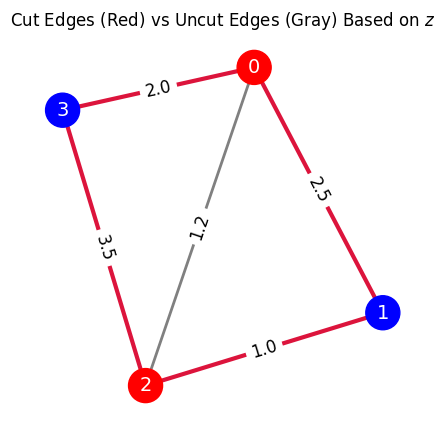

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define graph with edge weights
V = [0, 1, 2, 3]
E = [
    (0, 1, 2.5),
    (1, 2, 1.0),
    (2, 3, 3.5),
    (3, 0, 2.0),
    (0, 2, 1.2)
]

# Create graph
G = nx.Graph()
G.add_nodes_from(V)
for i, j, w in E:
    G.add_edge(i, j, weight=w)

# Node coloring: red (0) = subset A, blue (1) = subset B
z = [0, 1, 0, 1]  # bitstring: node i assigned to group z[i]
bit_to_color = {0: "red", 1: "blue"}
node_colors = [bit_to_color[b] for b in z]

# Classify edges by whether they are cut (z_i != z_j)
cut_edges = [(i, j) for (i, j) in G.edges() if z[i] != z[j]]
uncut_edges = [(i, j) for (i, j) in G.edges() if z[i] == z[j]]

# Layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes and labels
plt.figure(figsize=(5, 5))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=600)
nx.draw_networkx_labels(G, pos, font_color="white", font_size=14)

# Draw edges: red = cut, gray = not cut
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, edge_color="crimson", width=3)
nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, edge_color="gray", width=2)

# Draw edge weights
edge_labels = {(i, j): f"{G[i][j]['weight']}" for (i, j) in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="black", font_size=12)

plt.title("Cut Edges (Red) vs Uncut Edges (Gray) Based on $z$")
plt.axis("off")
plt.show()


# 1.2 Visual Intuition

To visualize this idea:

- Imagine **coloring** each vertex either **red** (which we represent with $z_i = 0$) or **blue** (represented by $z_i = 1$).
- For an edge $(i,j) \in E$:
  - If both vertices $i$ and $j$ have the **same color**, then the edge is **not cut** and contributes 0 to the score.
  - If the vertices have **different colors**, then the edge **is cut** and contributes its weight $w_{ij}$ to the total score.

This forms the basis of the **Weighted Max-Cut** problem: compute the sum of weights over all edges that are cut by a coloring, and choose the coloring that maximizes this total.


# 1.3 Mathematical Representation of Cuts
The conceptual framework and mathematical representations presented in this section closely follow standard formulations of the Max-Cut problem found in foundational literature, as also reflected in several of the resources listed in my bibliography. In particular, the spin-variable and bitwise formulations, along with their equivalence, are presented in alignment with the treatment given in the Max-Cut and TSP Example tutorial by the Qiskit community (Qiskit Community, Max-Cut and TSP).

Source: Qiskit Community. Qiskit Optimization: Max-Cut and TSP Example. GitHub, 2023, https://github.com/qiskit-community/qiskit-optimization/blob/stable/0.6/docs/tutorials/06_examples_max_cut_and_tsp.ipynb.

--------------


There are two equivalent ways to model whether an edge is cut:  
- **Classical bit-wise indicator** (involving bits $z_i \in \{0,1\}$)  
- **Spin-variable form** (using $Z_i = (-1)^{z_i} \in \{+1, -1\}$)

### Summary:

| Concept        | Representation                  | Meaning                               |
|----------------|----------------------------------|----------------------------------------|
| Vertex         | $z_i \in \{0,1\}$               | Side of the cut (subset A or B)        |
| Spin Variable  | $Z_i = (-1)^{z_i}$              | $+1$ or $-1$ encoding of $z_i$         |
| Edge           | $(i,j) \in E$                   | Connection between two vertices        |
| Edge status    | $Z_i Z_j$                       | $+1$ → same side, $-1$ → different     |
| Cut indicator  | $\frac{1 - Z_i Z_j}{2}$         | 1 if cut, 0 if not                     |
| Total Cut      | $\sum_{(i,j)\in E} \frac{1 - Z_i Z_j}{2}$ | Total number (or weight) of cut edges |

This formulation is especially useful for quantum algorithms, because it expresses the cost function in terms of **spin products**, which naturally correspond to **Pauli-Z operators** in quantum Hamiltonians.



### Classical Bit-wise Representation

- Each vertex is assigned a bit $z_i \in \{0,1\}$, where:
  - $z_i = 0$ → vertex is in subset A  (e.g., “red” side)
  - $z_i = 1$ → vertex is in subset B  (e.g., “blue” side)

- The full assignment is a bit-string:
  $$
  \mathbf{z} = (z_1, z_2, \dots, z_n) \in \{0,1\}^n
  $$

### Example

What does $\mathbf{z} \in \{0,1\}^n$ represent?
- $\mathbf{z}$ is a **vector (or list)** of length $n$
- Each entry $z_i$ in the vector is either $0$ or $1$

So for example, if $n = 4$, then one possible assignment is:
$$
\mathbf{z} = (0, 1, 0, 1) \in \{0,1\}^4
$$

This means:

- Vertex 0 is in **subset A** (color represented by 0: Red)
- Vertex 1 is in **subset B** (color represented by 1: Blue)
- Vertex 2 is in **subset A**
- Vertex 3 is in **subset B**

The full space $\{0,1\}^n$ contains all $2^n$ possible assignments of the $n$ vertices into two groups.

_________


- To determine whether an edge $(i,j) \in E$ is **cut**, we use XOR:
  $$
  \delta_{ij} = z_i \oplus z_j =
  \begin{cases}
    1, & z_i \ne z_j \quad \text{(edge is cut)} \\\\
    0, & z_i = z_j \quad \text{(edge is not cut)}
  \end{cases}
  $$

What does $\delta_{ij}$ represent?

It is the **cut indicator** for a single edge $(i,j)$. Specifically:

- $\delta_{ij} = 1$ → edge $(i,j)$ **is cut** (its endpoints are in different subsets (colors))
- $\delta_{ij} = 0$ → edge $(i,j)$ **is not cut** (its endpoints are in the same subset (colors))

We can think of $\delta_{ij}$ as a binary **edge-level decision variable** that tells you whether **that particular edge** contributes to the cut value.

In the full cost function, we sum over all edges:
$$
C(\mathbf{z}) = \sum_{(i,j) \in E} \delta_{ij}
$$


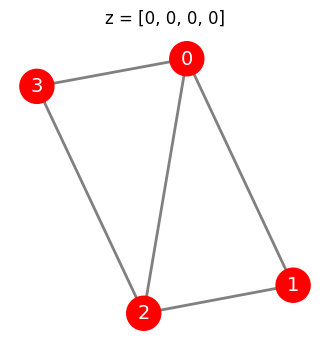

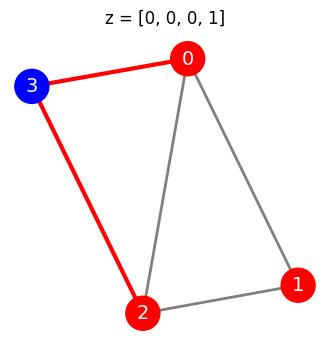

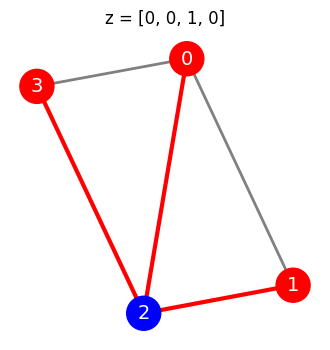

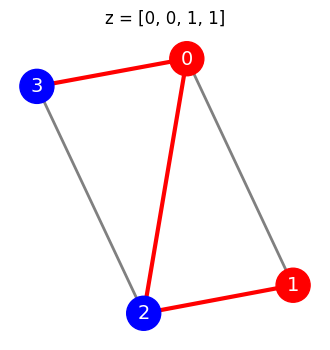

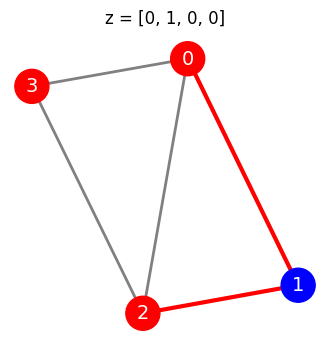

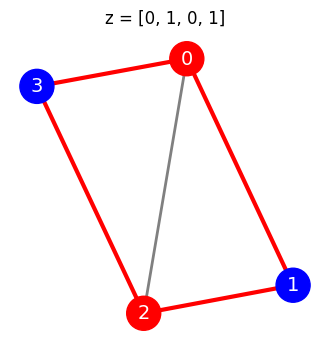

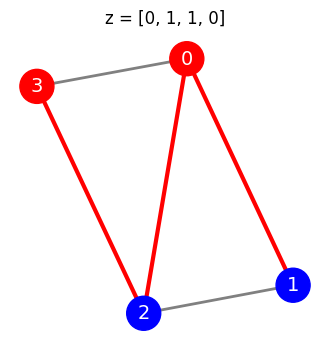

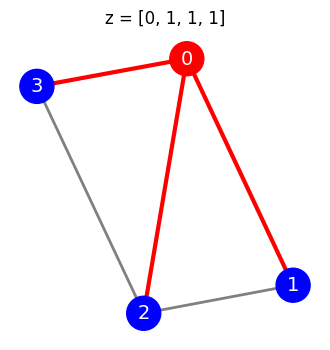

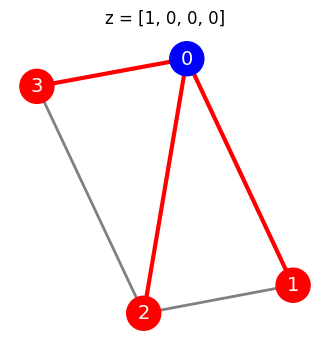

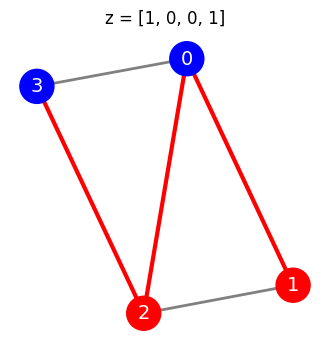

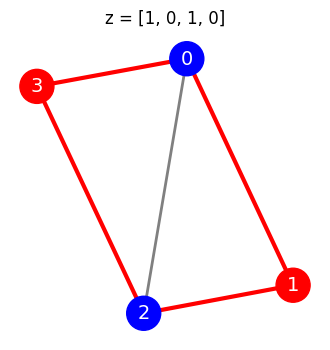

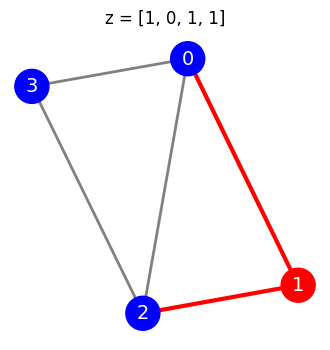

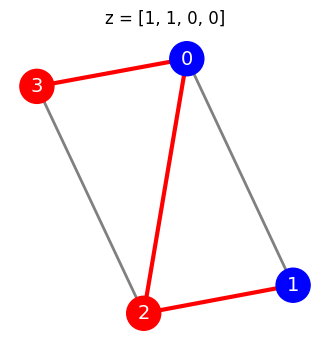

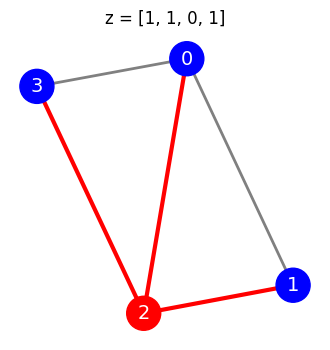

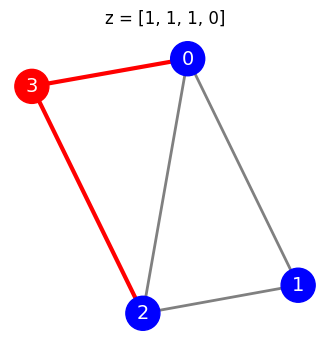

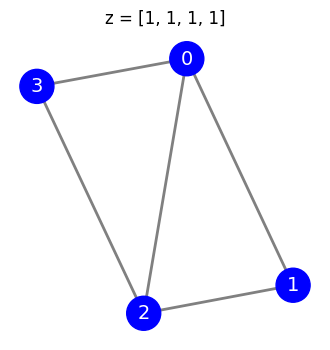

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import product

# Define a small graph
V = [0, 1, 2, 3]
E = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)]  # A 4-node cycle + diagonal

G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)

# Layout for consistent positioning
pos = nx.spring_layout(G, seed=42)

# Map bit 0 to red (subset A), bit 1 to blue (subset B)
bit_to_color = {0: "red", 1: "blue"}

def draw_cut(z):
    """
    Visualize the coloring z and show which edges are cut.
    z: list of 0/1 bits of length n
    """
    color_list = [bit_to_color[b] for b in z]

    # Decide which edges are cut
    cut_edges = [(i, j) for (i, j) in E if z[i] != z[j]]
    uncut_edges = [(i, j) for (i, j) in E if z[i] == z[j]]

    plt.figure(figsize=(4, 4))
    nx.draw_networkx_nodes(G, pos, node_color=color_list, node_size=600)
    nx.draw_networkx_labels(G, pos, font_color="white", font_size=14)
    nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, edge_color="gray", width=2)
    nx.draw_networkx_edges(G, pos, edgelist=cut_edges, edge_color="red", width=3)
    plt.title(f"z = {z}")
    plt.axis("off")
    plt.show()

# Visualize all 2^n possible colorings
for z in product([0, 1], repeat=len(V)):
    draw_cut(list(z))


### Spin-variable Representation

In the spin-variable formulation, we still work with a graph:

- A **vertex** corresponds to a node in the graph $G = (V, E)$.
  - Each vertex $i \in V$ is assigned a **bit** $z_i \in \{0, 1\}$, which can be mapped to a **spin value**:
    $$
    Z_i = (-1)^{z_i} \in \{+1, -1\}
    $$
    - If $z_i = 0$, then $Z_i = +1$
    - If $z_i = 1$, then $Z_i = -1$

- An **edge** corresponds to a pair of connected vertices $(i, j) \in E$.

### What does $Z_i Z_j$ mean?

- For each **edge** $(i, j)$, we take the **product of the spin values** $Z_i$ and $Z_j$.
- This product encodes whether the edge is **cut**:
  $$
  Z_i Z_j =
  \begin{cases}
    +1, & \text{if } z_i = z_j \quad \text{(edge is not cut)} \\\\
    -1, & \text{if } z_i \ne z_j \quad \text{(edge is cut)}
  \end{cases}
  $$

### How do we extract the cut indicator?

We define:
$$
\frac{1 - Z_i Z_j}{2} =
\begin{cases}
0, & \text{if } Z_i Z_j = +1 \quad (z_i = z_j) \\\\
1, & \text{if } Z_i Z_j = -1 \quad (z_i \ne z_j)
\end{cases}
$$

This gives exactly the same result as the classical XOR-based indicator $\delta_{ij}$:
$$
\delta_{ij} = z_i \oplus z_j
$$


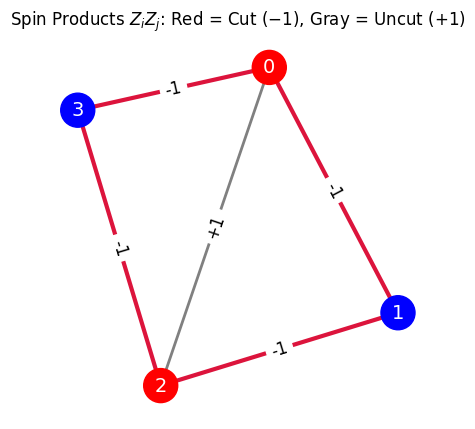

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define graph and weights
V = [0, 1, 2, 3]
E = [
    (0, 1, 2.5),
    (1, 2, 1.0),
    (2, 3, 3.5),
    (3, 0, 2.0),
    (0, 2, 1.2)
]

# Create graph
G = nx.Graph()
G.add_nodes_from(V)
for i, j, w in E:
    G.add_edge(i, j, weight=w)

# Sample bitstring assignment z ∈ {0,1}^n
z = [0, 1, 0, 1]  # coloring
bit_to_color = {0: "red", 1: "blue"}
node_colors = [bit_to_color[b] for b in z]

# Define spins: Z_k = (-1)^z_k
Z = [(-1) ** b for b in z]

# Identify cut vs uncut edges based on spin product
cut_edges = []
uncut_edges = []
spin_labels = {}

for (i, j) in G.edges():
    prod = Z[i] * Z[j]
    spin_labels[(i, j)] = f"{prod:+.0f}"  # +1 or -1 label
    if prod == -1:
        cut_edges.append((i, j))
    else:
        uncut_edges.append((i, j))

# Layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes
plt.figure(figsize=(5, 5))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=600)
nx.draw_networkx_labels(G, pos, font_color="white", font_size=14)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, edge_color="crimson", width=3)
nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, edge_color="gray", width=2)

# Label edges with Z_i * Z_j = ±1
nx.draw_networkx_edge_labels(G, pos, edge_labels=spin_labels, font_color="black", font_size=12)

plt.title("Spin Products $Z_i Z_j$: Red = Cut ($-1$), Gray = Uncut ($+1$)")
plt.axis("off")
plt.show()


### Summary

| Concept        | Representation                  | Meaning                               |
|----------------|----------------------------------|----------------------------------------|
| Vertex         | $z_i \in \{0,1\}$               | Side of the cut (subset A or B)        |
| Spin Variable  | $Z_i = (-1)^{z_i}$              | $+1$ or $-1$ encoding of $z_i$         |
| Edge           | $(i,j) \in E$                   | Connection between two vertices        |
| Edge status    | $Z_i Z_j$                       | $+1$ → same side, $-1$ → different     |
| Cut indicator  | $\frac{1 - Z_i Z_j}{2}$         | 1 if cut, 0 if not                     |
| Total Cut      | $\sum_{(i,j)\in E} \frac{1 - Z_i Z_j}{2}$ | Total number (or weight) of cut edges |


### Why Do We Switch to Spin Variables?

We switch to the “spin” variables $Z_i \in \{+1, -1\}$ for two main reasons:

#### 1. **Direct correspondence to the Pauli-$Z$ operator in the quantum Hamiltonian**

In the quantum algorithm, we promote each classical bit $z_i$ to a qubit in the computational basis, where the **Pauli-$Z$ operator** acts as:

$$
Z_i \lvert 0\rangle = +1\lvert 0\rangle, \quad Z_i \lvert 1\rangle = -1\lvert 1\rangle
$$

Writing our cost in terms of the **products of these eigenvalues** $Z_i Z_j \in \{+1, -1\}$ makes it straightforward to see that:

- Measuring $Z_i Z_j$ on the state $\lvert z_i z_j \rangle$ tells us whether $z_i \ne z_j$
- This **reproduces the classical XOR condition** $z_i \oplus z_j$

#### 2. **Algebraic simplicity and mapping to an Ising-model form**

- In **Boolean form**, each edge's contribution is expressed as:
  $$
  z_i \oplus z_j \in \{0, 1\}
  $$
- In **spin form**, the same condition is written as:
  $$
  \frac{1 - Z_i Z_j}{2} \in \{0, 1\}
  $$

This allows us to write the total cost function (Hamiltonian) more cleanly:
$$
H_C = \sum_{(i,j) \in E} \frac{1 - Z_i Z_j}{2}
= \text{constant} - \frac{1}{2} \sum_{(i,j) \in E} Z_i Z_j
$$

(Note: This is exactly the **Ising Hamiltonian** used in statistical physics and quantum optimization. This compact form is easier to manipulate.)


# 1.4 Weighted Cost Function in Spin-Variable Form

We now define the **cost function** for the weighted Max-Cut problem using the **spin-variable representation**.

- Each edge $(i,j) \in E$ has an associated **positive weight** $w_{ij} > 0$.
- Each vertex $i \in V$ is assigned a classical bit $z_i \in \{0, 1\}$, which we map to a spin variable:
  $$
  Z_i = (-1)^{z_i} \in \{+1, -1\}
  $$

#### Edge-wise Contribution

For each edge $(i,j)$, we compute the contribution:
$$
w_{ij} \cdot \frac{1 - Z_i Z_j}{2}
$$

This expression evaluates to:

- $0$ if the two endpoints are in the **same subset** (i.e., $z_i = z_j$, so $Z_i Z_j = +1$),
- $w_{ij}$ if the two endpoints are in **different subsets** (i.e., $z_i \ne z_j$, so $Z_i Z_j = -1$).

This captures exactly when the edge is **cut**.

#### Total Cost Function

The full **weighted cost** becomes:
$$
C(\mathbf{z}) = \sum_{(i,j) \in E} w_{ij} \cdot \frac{1 - Z_i Z_j}{2}
$$

This is the quantity we aim to **maximize**: the total weight of edges that are cut by the bipartition defined by the bitstring $\mathbf{z}$.

This formulation will also serve as the **Cost Hamiltonian** when we transition to the quantum QAOA algorithm.


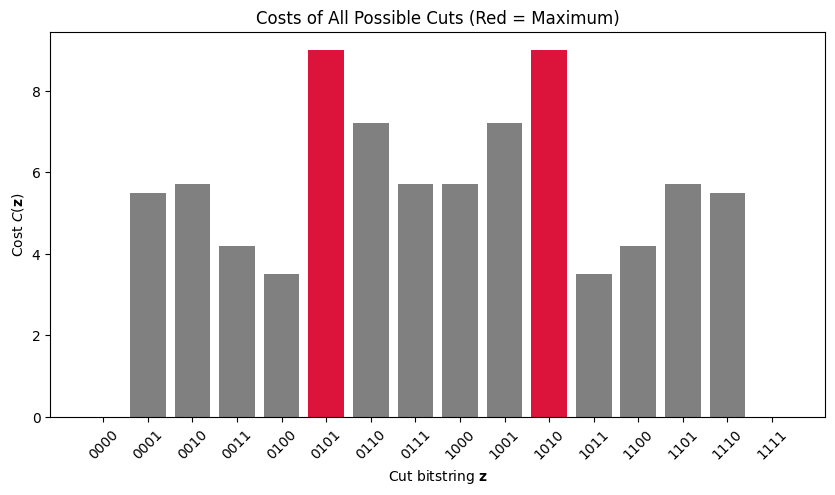

In [ ]:
# 1.5 Visualization of All Cuts and Highlighting the Maximum

import matplotlib.pyplot as plt
import networkx as nx
from itertools import product

# Define graph G = (V, E) with weights
V = [0, 1, 2, 3]
E = [
    (0, 1, 2.5),
    (1, 2, 1.0),
    (2, 3, 3.5),
    (3, 0, 2.0),
    (0, 2, 1.2)
]

# Build graph
G = nx.Graph()
G.add_nodes_from(V)
for i, j, w in E:
    G.add_edge(i, j, weight=w)

# Enumerate all bitstrings and compute costs
cuts = []
costs = []
for z in product([0,1], repeat=len(V)):
    cost = sum(w * (z[i] != z[j]) for i, j, w in E)
    cuts.append(''.join(map(str, z)))
    costs.append(cost)

# Identify maximum cost
max_cost = max(costs)
max_indices = [i for i, c in enumerate(costs) if c == max_cost]

# Bar chart
plt.figure(figsize=(10,5))
colors = ['crimson' if i in max_indices else 'gray' for i in range(len(cuts))]
plt.bar(cuts, costs, color=colors)
plt.xticks(rotation=45)
plt.xlabel("Cut bitstring $\\mathbf{z}$")
plt.ylabel("Cost $C(\\mathbf{z})$")
plt.title("Costs of All Possible Cuts (Red = Maximum)")
plt.show()


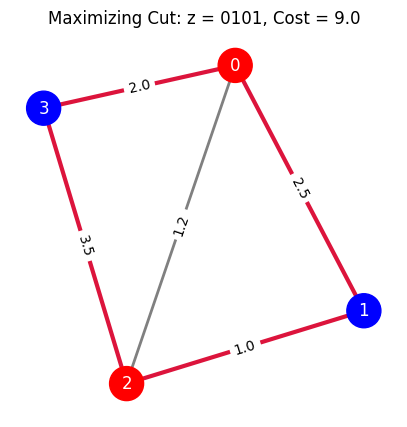

In [ ]:
# Visualize the maximizing cut

# Pick the first maximizing bitstring
best_index = max_indices[0]
best_z = [int(bit) for bit in cuts[best_index]]

# Node colors and edge classification
node_colors = ['red' if bit == 0 else 'blue' for bit in best_z]
cut_edges = [(i, j) for i, j, w in E if best_z[i] != best_z[j]]
uncut_edges = [(i, j) for i, j, w in E if best_z[i] == best_z[j]]

# Layout and drawing
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(5,5))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=600)
nx.draw_networkx_labels(G, pos, font_color='white')
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, edge_color='crimson', width=3)
nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, edge_color='gray', width=2)
edge_labels = {(i, j): f"{w:.1f}" for i, j, w in E}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')
plt.title(f"Maximizing Cut: z = {cuts[best_index]}, Cost = {max_cost}")
plt.axis('off')
plt.show()


## 2. Classical Max-Cut Algorithms

In this section, we implement and compare **classical algorithms** for solving the **Max-Cut problem**. Each method provides a baseline to benchmark the performance of quantum algorithms like QAOA.

We analyze three classical strategies:

### Summary Table

Let:

- $n$ = number of vertices  
- $\lvert E \rvert$ = number of edges  
- $\text{iter}$ = number of iterations until convergence (empirically small)

| Method                                                                 | Runtime Complexity                                        | Memory Footprint         | Structural Notes                                                | Accuracy     |
|------------------------------------------------------------------------|-----------------------------------------------------------|---------------------------|--------------------------------------------------------------------|--------------|
| **Brute-Force Enumeration** (direct loop over $\{0,1\}^n$)            | $O\bigl(2^n\,\lvert E \rvert\bigr)$ (Exponential)         | $O(1)$                    | ✗ No structure exploited; loops through all $2^n$ assignments      | ✓ Exact      |
| **Hamiltonian Diagonalization** (SparsePauliOp → dense matrix)        | $O\bigl(2^{3n}\bigr)$ (Exponential)                       | $O(2^{2n})$               | ✓ Matches QAOA’s Ising Hamiltonian; impractical for $n \gtrsim 10$ | ✓ Exact      |
| **Greedy Local Search** (bit-flip heuristic with gain updates)        | $O\bigl(n\,\lvert E \rvert \cdot \text{iter}\bigr)$ (Polynomial) | $O(1)$            | ✓ Exploits local edge weights; iterative bit-flip improvement     | ✗ Approximate     |

Each method offers different trade-offs in terms of accuracy, scalability, and interpretability.

## 2.1. Brute-Force Enumeration (Direct Loop Over $\{0,1\}^n$)

This method exhaustively checks every possible assignment $\mathbf{z}\in\{0,1\}^n$, computing the total weight of the cut for each. It guarantees the **global optimum**, but is only practical for small $n$ due to its exponential runtime.

### Algorithm Overview

1. **Enumerate** all $2^n$ binary bitstrings $\mathbf{z}=(z_0,\dots,z_{n-1})$.  
2. **For each** $\mathbf{z}$:  
   - Compute  
     $$
     C(\mathbf{z}) = \sum_{(i,j)\in E} w_{ij}\,\bigl[z_i \neq z_j\bigr] = \sum_{(i,j) \in E} w_{ij} \cdot \frac{1 - Z_i Z_j}{2},
     $$  
     adding $w_{ij}$ whenever $z_i \neq z_j$.  
3. **Track** the best-so-far: if $C(\mathbf{z})$ exceeds the current maximum, update your record of $(C_{\max},\mathbf{z}_{\rm opt})$.  
4. **Return** $(C_{\max},\mathbf{z}_{\rm opt})$ after all bitstrings are evaluated.


In [ ]:
def brute_force_max_cut(weights, n):
    """
    Exact Max-Cut by brute-force enumeration.
    Args:
        weights: dict mapping edge (i,j) to weight w_ij
        n:       number of vertices
    Returns:
        best_cost: maximum cut value
        best_z:    bit-vector achieving it
    """
    best_cost = -1
    best_z = None

    for x in range(2**n):
        # Decode integer x to bit-vector z
        z = [(x >> i) & 1 for i in range(n)]
        # Compute weighted cut
        cost = sum(w * (z[i] != z[j]) for (i,j), w in weights.items())
        if cost > best_cost:
            best_cost, best_z = cost, z

    return best_cost, best_z

# Example usage:
weights = {
    (0,1): 2.5,
    (1,2): 1.0,
    (2,3): 3.5,
    (3,0): 2.0,
    (0,2): 1.2
}
n = 4
C_max, z_opt = brute_force_max_cut(weights, n)
print(f"Brute-force max cut = {C_max:.1f} with z = {z_opt}")

Brute-force max cut = 9.0 with z = [1, 0, 1, 0]


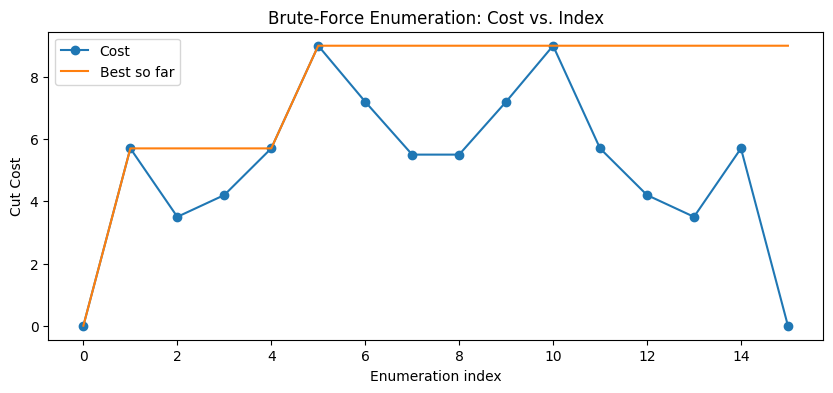

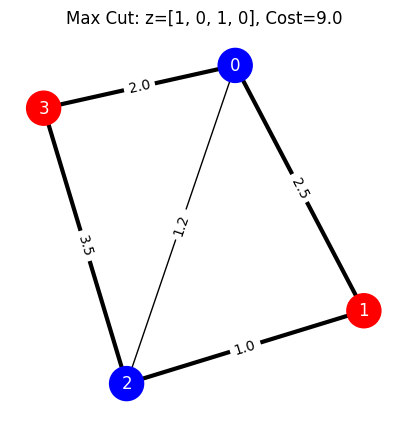

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import product

# Define graph with weights
V = [0, 1, 2, 3]
E = [
    (0, 1, 2.5),
    (1, 2, 1.0),
    (2, 3, 3.5),
    (3, 0, 2.0),
    (0, 2, 1.2)
]
G = nx.Graph()
G.add_nodes_from(V)
for i, j, w in E:
    G.add_edge(i, j, weight=w)

# Brute-force enumeration
n = len(V)
costs = []
best_so_far = []
best = -1
best_z = None

for x in range(2**n):
    # Decode bitstring
    z = [(x >> i) & 1 for i in range(n)]
    # Compute cost
    cost = sum(w * (z[i] != z[j]) for (i, j, w) in E)
    if cost > best:
        best = cost
        best_z = z.copy()
    costs.append(cost)
    best_so_far.append(best)

# Plot cost progression
plt.figure(figsize=(10, 4))
plt.plot(costs, marker='o', linestyle='-', label='Cost')
plt.plot(best_so_far, linestyle='-', label='Best so far')
plt.xlabel('Enumeration index')
plt.ylabel('Cut Cost')
plt.title('Brute-Force Enumeration: Cost vs. Index')
plt.legend()
plt.show()

# Visualize the maximized cut
node_colors = ['red' if bit == 0 else 'blue' for bit in best_z]
cut_edges = [(i, j) for (i, j, w) in E if best_z[i] != best_z[j]]
uncut_edges = [(i, j) for (i, j, w) in E if best_z[i] == best_z[j]]

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(5, 5))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=600)
nx.draw_networkx_labels(G, pos, font_color='white')
nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, width=1)
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, width=3)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f"{w:.1f}" for (i, j, w) in E})
plt.title(f"Max Cut: z={best_z}, Cost={best:.1f}")
plt.axis('off')
plt.show()


## 2.2. Hamiltonian Diagonalization (SparsePauliOp → Dense matrix)

In this section, I use linear algebra techniques to compute the exact maximum cut by diagonalizing the full cost Hamiltonian matrix. Although the underlying operator is constructed using Qiskit’s `SparsePauliOp`—a tool typically associated with quantum computing—this method is purely classical: I convert the symbolic operator into a dense \$2^n \times 2^n\$ matrix and perform eigendecomposition to identify the bitstring yielding the highest cut value.

This approach mirrors the methodology introduced in the *Max-Cut and TSP Example* by the Qiskit community (Qiskit Community, *Max-Cut and TSP*), though here it is repurposed as a classical benchmark. While computationally impractical for large \$n\$, this method provides an exact reference for small graphs and helps validate both brute-force and quantum-inspired approximations.

Source: Qiskit Community. Qiskit Optimization: Max-Cut and TSP Example. GitHub, 2023, https://github.com/qiskit-community/qiskit-optimization/blob/stable/0.6/docs/tutorials/06_examples_max_cut_and_tsp.ipynb.

------------

This method builds the Max-Cut **cost Hamiltonian** as a weighted sum of Pauli $Z$ operators using Qiskit’s `SparsePauliOp`, converts it to a dense matrix, and **diagonalizes** it to recover the **global optimum**. It serves as a bridge to the quantum QAOA algorithm but is computationally feasible **only for small graphs** ($n \lesssim 10$).

### Algorithm Overview

1. **Build the Ising Hamiltonian**  
We had derived the **original Max-Cut cost function** in **spin variables**:

$$
C(\mathbf{z}) = \sum_{(i,j) \in E} w_{ij} \cdot \frac{1 - Z_i Z_j}{2}
$$

Here:

* $Z_i = (-1)^{z_i} \in \{+1, -1\}$
* So $Z_i Z_j = +1$ if $z_i = z_j$ ⇒ edge **not** cut
* $Z_i Z_j = -1$ if $z_i \ne z_j$ ⇒ edge **cut**

Now let’s rewrite this function in Hamiltonian form:

$$
C(\mathbf{z}) = \sum_{(i,j) \in E} w_{ij} \cdot \frac{1 - Z_i Z_j}{2} = \underbrace{-\sum_{(i,j)} \frac{w_{ij}}{2} Z_i Z_j}_{\text{Operator}} + \underbrace{\sum_{(i,j)} \frac{w_{ij}}{2}}_{\text{Shift}}
$$

This is done purely for mathematical convenience:

* We isolate the **operator** part, which is linear in the Pauli $Z$ operators.
* The **constant shift** just rescales all eigenvalues and doesn't affect the bitstring that maximizes the cut.

### Note on why **cost function to still evaluate to 0** when $Z_i Z_j = +1$

Because we want the Hamiltonian to output **high values** when the cut is large (which happens when more terms $Z_i Z_j = -1$ appear). So:

* Each $Z_i Z_j = -1$ ⇒ term contributes $+\frac{w_{ij}}{2}$
* Each $Z_i Z_j = +1$ ⇒ contributes $-\frac{w_{ij}}{2}$

Thus, the total operator:

$$
H_C = -\sum_{(i,j)} \frac{w_{ij}}{2} Z_i Z_j
$$

has higher eigenvalues for cut-heavy bitstrings. We just need to **add back** the shift to recover the true cost:

$$
C_{\max} = E_{\max} + \sum_{(i,j)} \frac{w_{ij}}{2}
$$

This step lets the actual **cost function to still evaluate to 0** when $Z_i Z_j = +1$ so that we are **not adding weight when the edge isn’t cut**. In this last step, we're shifting the entire spectrum to center the Hamiltonian around 0 and simplify optimization.


**2. Encode the Operator in Pauli-Z**

- Next, we build the Hamiltonian using **Pauli Z operators**. Each interaction term $Z_i Z_j$ is represented by a Pauli string with `'Z'` at positions $i$ and $j$, and `'I'` (identity) elsewhere.
- The coefficient of each such Pauli string is $-w_{ij}/2$, reflecting the contribution to the cost when that edge is cut.
- This symbolic encoding prepares the Hamiltonian for matrix conversion.

**3. Convert to a Dense Matrix**

- Once all Pauli terms are defined, we convert the symbolic Hamiltonian into a full $2^n \times 2^n$ matrix.
- This matrix captures all possible interactions between spin configurations and is mathematically equivalent to the cost function evaluated over the entire solution space.
- However, the memory cost is $O(2^{2n})$, so this step is only realistic for $n \lesssim 10$.

**4. Diagonalize the Matrix**

- We now perform **eigendecomposition** of the Hamiltonian.
- The eigenvalues correspond to possible cost function values (up to the shift), and the eigenvectors correspond to quantum superpositions over bitstrings.
- The **largest eigenvalue** gives the best achievable value of the operator, i.e., the **maximum cut energy**.

**5. Decode the Optimal Bitstring**

- The eigenvector associated with the largest eigenvalue identifies the optimal solution.
- We locate the index (i.e., basis state) with the highest amplitude in that eigenvector, and decode it as the corresponding bitstring $\mathbf{z}_{\text{opt}}$.
- This bitstring defines the partition of the graph that gives the maximum cut.

**6. Recover the True Max-Cut Value**

- Finally, we **add back the constant shift** we had separated in Step 1.
- This yields the final cut value:

  $$
  C_{\max} = E_{\max} + \sum_{(i,j)} \frac{w_{ij}}{2}
  $$

- This result matches the one from brute-force search but is derived by working with the **quantum Hamiltonian** formulation.

In [ ]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np

def hamiltonian_max_cut(weights):
    """
    Exact Max-Cut via Hamiltonian diagonalization.

    Args:
        weights: dict mapping edge (i,j) to positive weight w_ij

    Returns:
        C_max: maximum cut value
        z_opt: bit-vector achieving C_max
    """
    # 1) Determine number of vertices
    n = max(max(i, j) for i, j in weights) + 1

    # 2) Build Pauli-Z Hamiltonian terms and compute shift
    labels, coeffs = [], []
    shift = 0.0
    for (i, j), w in weights.items():
        shift += w / 2
        # Pauli string: 'Z' at qubits i and j, 'I' elsewhere
        label = "".join('Z' if k == i or k == j else 'I' for k in range(n))
        labels.append(label)
        coeffs.append(-w / 2)

    # 3) Construct SparsePauliOp and convert to dense matrix
    op = SparsePauliOp.from_list(list(zip(labels, coeffs)))
    H = op.to_matrix()  # shape: (2^n, 2^n)

    # 4) Diagonalize
    eigvals, eigvecs = np.linalg.eigh(H)

    # 5) Select the maximum eigenvalue/state
    idx_max = np.argmax(eigvals)
    E_max = eigvals[idx_max]
    psi_max = eigvecs[:, idx_max]

    # 6) Decode the optimal bitstring from the dominant basis component
    state_index = int(np.argmax(np.abs(psi_max)**2))
    z_str = format(state_index, f'0{n}b')
    z_opt = [int(bit) for bit in z_str]

    # 7) Recover the true Max-Cut value by adding the shift
    C_max = E_max + shift

    return C_max, z_opt

# Example usage:
weights = {
    (0, 1): 2.5,
    (1, 2): 1.0,
    (2, 3): 3.5,
    (3, 0): 2.0,
    (0, 2): 1.2
}
C_max, z_opt = hamiltonian_max_cut(weights)
print(f"Hamiltonian max cut = {C_max:.2f} with z = {z_opt}")


Hamiltonian max cut = 9.00 with z = [0, 1, 0, 1]


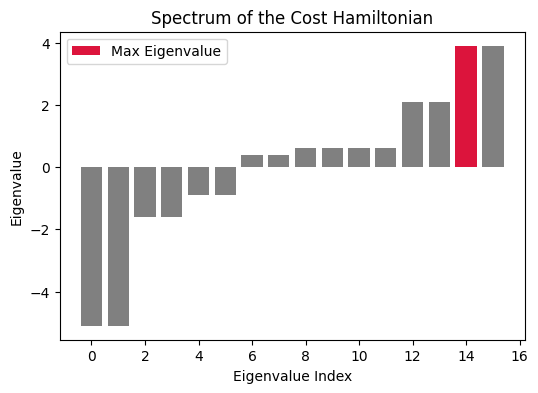

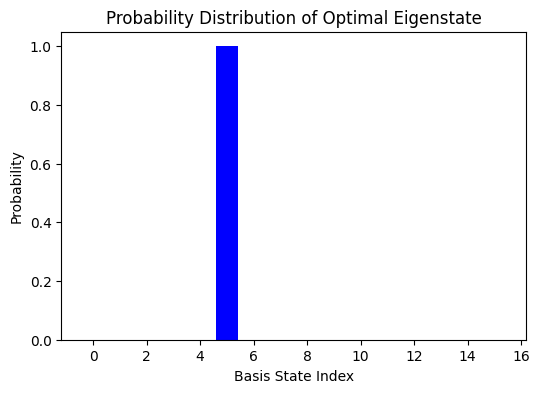

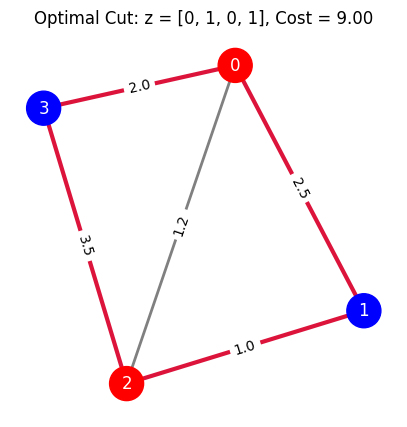

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from qiskit.quantum_info import SparsePauliOp

def hamiltonian_max_cut(weights):
    """
    Returns:
      eigvals    – all eigenvalues of H_C
      psi_max    – eigenvector corresponding to max eigenvalue
      z_opt      – optimal bitstring
      C_max      – true Max-Cut value
    """
    n = max(max(i, j) for i, j in weights) + 1
    labels, coeffs, shift = [], [], 0.0
    for (i, j), w in weights.items():
        shift += w / 2
        label = "".join('Z' if k in (i, j) else 'I' for k in range(n))
        labels.append(label)
        coeffs.append(-w / 2)
    op = SparsePauliOp.from_list(list(zip(labels, coeffs)))
    H = op.to_matrix()
    eigvals, eigvecs = np.linalg.eigh(H)
    idx_max = int(np.argmax(eigvals))
    psi_max = eigvecs[:, idx_max]
    state_index = int(np.argmax(np.abs(psi_max) ** 2))
    z_str = format(state_index, f'0{n}b')
    z_opt = [int(bit) for bit in z_str]
    C_max = eigvals[idx_max] + shift
    return eigvals, psi_max, z_opt, C_max

# Example graph weights
weights = {
    (0, 1): 2.5,
    (1, 2): 1.0,
    (2, 3): 3.5,
    (3, 0): 2.0,
    (0, 2): 1.2
}

# Compute eigenvalues, eigenvector, optimal cut
eigvals, psi_max, z_opt, C_max = hamiltonian_max_cut(weights)
n = len(z_opt)
indices = np.arange(len(eigvals))

# 1) Eigenvalue Spectrum
plt.figure(figsize=(6, 4))
plt.bar(indices, eigvals, color='gray')
plt.bar(indices[np.argmax(eigvals)], eigvals.max(), color='crimson', label='Max Eigenvalue')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Spectrum of the Cost Hamiltonian')
plt.legend()
plt.show()

# 2) Amplitude Squared of Max-Energy Eigenstate
plt.figure(figsize=(6, 4))
probs = np.abs(psi_max)**2
plt.bar(indices, probs, color='blue')
plt.xlabel('Basis State Index')
plt.ylabel('Probability')
plt.title('Probability Distribution of Optimal Eigenstate')
plt.show()

# 3) Visualize Optimal Cut on Graph
V = list({i for edge in weights for i in edge})
G = nx.Graph()
G.add_nodes_from(V)
for (i, j), w in weights.items():
    G.add_edge(i, j, weight=w)
pos = nx.spring_layout(G, seed=42)

node_colors = ['red' if bit == 0 else 'blue' for bit in z_opt]
cut_edges = [(i, j) for (i, j), w in weights.items() if z_opt[i] != z_opt[j]]
uncut_edges = [(i, j) for (i, j), w in weights.items() if z_opt[i] == z_opt[j]]

plt.figure(figsize=(5, 5))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=600)
nx.draw_networkx_labels(G, pos, font_color='white')
nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, width=2, edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, width=3, edge_color='crimson')
nx.draw_networkx_edge_labels(G, pos, edge_labels={e: f"{w:.1f}" for e, w in weights.items()})
plt.title(f"Optimal Cut: z = {z_opt}, Cost = {C_max:.2f}")
plt.axis('off')
plt.show()


## 2.3. Greedy Local Search (Bit-flip Heuristic with Gain Updates)

This section implements a local search heuristic that begins from a randomly chosen bitstring and improves it by iteratively flipping the bit that yields the largest increase in the cut value. While this method does not guarantee the global optimum, it is lightweight and performs well on small instances. The algorithmic structure—particularly the use of spin-based gain calculations and bit-flip updates—was discussed conceptually in IBM Quantum’s Lecture 5.2 on QAOA and its classical analogs (IBM Quantum, Lecture 5.2).

Source: IBM Quantum. Lecture 5.2 – Introduction to the Quantum Approximate Optimization Algorithm and Applications. YouTube, uploaded by Qiskit, 27 Mar. 2023, https://www.youtube.com/watch?v=YpLzSQPrgSc&t=649s.

This heuristic starts from a random assignment and iteratively flips the bit whose change yields the largest positive gain in cut weight, until no further improvement is possible.

### Algorithm

1. **Initialize** a random bitstring $\mathbf{z}\in\{0,1\}^n$ and compute spins $Z_i=(-1)^{z_i}$.
2. **Repeat** up to `max_iters` times:
   - For each vertex $i$, compute the **gain**
     $$
     \Delta C_i
     = \sum_{(i,j)\in E} w_{ij}\Bigl[\tfrac{1 - Z'_i Z_j}{2} - \tfrac{1 - Z_i Z_j}{2}\Bigr]
     $$
     where $Z'_i=-Z_i$ is the flipped spin.
   - If $\max_i \Delta C_i \le 0$, stop—no further improvement.
   - Otherwise, **flip** the bit $z_i$ with the largest positive $\Delta C_i$.
3. **Compute** the final cut weight
   $$
   C(\mathbf{z}) = \sum_{(i,j)\in E} w_{ij}\,[z_i \ne z_j].
   $$

In [ ]:
import random
def greedy_max_cut(weights, n, max_iters=100):
    """
    Approximate Max-Cut via a greedy bit-flip heuristic.

    Args:
        weights: dict mapping edge (i, j) to positive weight w_ij
        n:       number of vertices
        max_iters: maximum number of bit-flip passes

    Returns:
        best_cost: approximated max-cut value
        best_z:    bit-vector found
    """
    # 1) Initialize random bitstring and spins
    z = [random.choice([0, 1]) for _ in range(n)]
    Z = [(-1)**bit for bit in z]

    for _ in range(max_iters):
        # 2) Compute gain for flipping each bit
        deltas = []
        for i in range(n):
            Zi_flip = -Z[i]
            delta = 0.0
            for (u, v), w in weights.items():
                if u == i or v == i:
                    j = v if u == i else u
                    delta += w * ((1 - Zi_flip*Z[j]) / 2 - (1 - Z[i]*Z[j]) / 2)
            deltas.append(delta)

        # 3) Stop if no positive gain
        best_delta = max(deltas)
        if best_delta <= 0:
            break

        # 4) Flip the bit with the largest gain
        i_star = deltas.index(best_delta)
        z[i_star] = 1 - z[i_star]
        Z[i_star] *= -1

    # 5) Compute final cut cost
    best_cost = sum(w * (z[u] != z[v]) for (u, v), w in weights.items())
    return best_cost, z

# Example usage:
weights = {
    (0,1): 2.5,
    (1,2): 1.0,
    (2,3): 3.5,
    (3,0): 2.0,
    (0,2): 1.2
}
n = 4
C_greedy, z_greedy = greedy_max_cut(weights, n)
print(f"Greedy max cut = {C_greedy:.2f} with z = {z_greedy}")


Greedy max cut = 9.00 with z = [1, 0, 1, 0]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
from matplotlib import animation
from IPython.display import HTML

def greedy_trace(weights, n, max_iters=100):
    """
    Run greedy local search and track cost and best-so-far configurations.
    """
    z = [random.choice([0,1]) for _ in range(n)]
    Z = [(-1)**bit for bit in z]
    costs, best_costs, best_zs = [], [], []
    best_cost = sum(w * (z[i] != z[j]) for (i,j), w in weights.items())
    best_z = z.copy()

    for _ in range(max_iters):
        cost = sum(w * (z[i] != z[j]) for (i,j), w in weights.items())
        if cost > best_cost:
            best_cost = cost
            best_z = z.copy()
        costs.append(cost)
        best_costs.append(best_cost)
        best_zs.append(best_z.copy())

        # compute gain for each bit
        deltas = []
        for i in range(n):
            Zi_flip = -Z[i]
            delta = 0
            for (u,v), w in weights.items():
                if u == i or v == i:
                    j = v if u == i else u
                    delta += w * ((1 - Zi_flip*Z[j])/2 - (1 - Z[i]*Z[j])/2)
            deltas.append(delta)

        # stop if no improvement
        max_delta = max(deltas)
        if max_delta <= 0:
            break

        # flip best gain
        i_star = deltas.index(max_delta)
        z[i_star] = 1 - z[i_star]
        Z[i_star] *= -1

    return costs, best_costs, best_zs

def animate_greedy(weights, n, max_iters=10):
    """
    Build and return an HTML animation of the greedy search process over max_iters.
    """
    costs, best_costs, best_zs = greedy_trace(weights, n, max_iters)
    iterations = list(range(len(costs)))

    # Prepare graph
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for (i,j), w in weights.items():
        G.add_edge(i, j, weight=w)
    pos = nx.spring_layout(G, seed=42)

    # Create figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

    def init():
        ax1.clear()
        ax2.clear()
        ax1.set_title("Greedy Local Search Progress")
        ax1.set_xlabel("Iteration")
        ax1.set_ylabel("Cut Cost")
        ax1.set_xlim(0, len(costs)-1)
        ax1.set_ylim(min(costs)-1, max(best_costs)+1)
        ax2.axis('off')

    def update(frame):
        init()
        # plot costs
        ax1.plot(iterations, costs, marker='o', color='gray', label='Cost')
        ax1.plot(iterations, best_costs, marker='o', color='blue', label='Best so far')
        ax1.axvline(frame, color='orange', linestyle='--', label='Current iter')
        ax1.legend(loc='lower right')
        # plot graph state
        z_best = best_zs[frame]
        node_colors = ['red' if bit==0 else 'blue' for bit in z_best]
        cut_edges = [(i,j) for (i,j), w in weights.items() if z_best[i]!=z_best[j]]
        uncut_edges = [(i,j) for (i,j), w in weights.items() if z_best[i]==z_best[j]]
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, ax=ax2, node_size=600)
        nx.draw_networkx_labels(G, pos, ax=ax2, font_color='white')
        nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, ax=ax2, width=2, edge_color='gray')
        nx.draw_networkx_edges(G, pos, edgelist=cut_edges, ax=ax2, width=3, edge_color='crimson')
        nx.draw_networkx_edge_labels(G, pos, ax=ax2, edge_labels={e:f"{weights[e]:.1f}" for e in weights})
        ax2.set_title(f"Iter {frame}: Best = {best_costs[frame]:.1f}")
        ax2.axis('off')

    ani = animation.FuncAnimation(fig, update, frames=len(costs), init_func=init,
                                  blit=False, repeat=False)
    plt.close(fig)
    return HTML(ani.to_jshtml())

# Example usage: animate with 10 iterations
weights = {(0,1):2.5, (1,2):1.0, (2,3):3.5, (3,0):2.0, (0,2):1.2}
n = 4
animate_greedy(weights, n, max_iters=10)


### Why Do We See Two Iterations In the Above Example?

1. Starts with a random bitstring → computes initial cost.  
2. Finds the one bit‐flip that gives the biggest positive gain → updates the bitstring → computes new cost.  
3. Sees that **no further single‐bit flip** can improve the cost, so it **stops**.

Hence we get exactly **two** cost‐values in the history: the **initial** cost and the **one** successful flip.

### What If We Did Not Break Early?

Even if a flip doesn’t help, below algorithm will still record the cost and proceed till the fixed iteration.


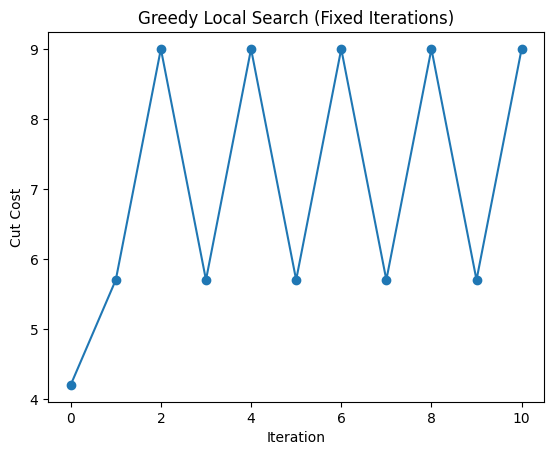

In [ ]:
import random
import matplotlib.pyplot as plt
import networkx as nx

def greedy_max_cut_full_history(weights, n, max_iters=10):
    # 1) Initialize
    z = [random.choice([0,1]) for _ in range(n)]
    Z = [(-1)**bit for bit in z]
    history = [sum(w * (z[i] != z[j]) for (i,j), w in weights.items())]

    # 2) Iterate fixed number of times
    for _ in range(max_iters):
        # Compute gains for flipping each bit
        deltas = []
        for i in range(n):
            Zi_flip = -Z[i]
            delta = 0.0
            for (u,v), w in weights.items():
                if u==i or v==i:
                    j = v if u==i else u
                    delta += w*((1 - Zi_flip*Z[j])/2 - (1 - Z[i]*Z[j])/2)
            deltas.append(delta)

        # Flip the best—even if gain ≤ 0
        i_star = max(range(n), key=lambda i: deltas[i])
        z[i_star] = 1 - z[i_star]
        Z[i_star] *= -1

        # Record cost after this flip
        history.append(sum(w * (z[i] != z[j]) for (i,j), w in weights.items()))

    return z, history

# Example usage
weights = {(0,1):2.5, (1,2):1.0, (2,3):3.5, (3,0):2.0, (0,2):1.2}
n = 4
z_opt, cost_history = greedy_max_cut_full_history(weights, n, max_iters=10)

# Plotting
plt.plot(cost_history, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Cut Cost')
plt.title('Greedy Local Search (Fixed Iterations)')
plt.show()

### Summary Table

Let:

- $n$ = number of vertices  
- $\lvert E \rvert$ = number of edges  
- $\text{iter}$ = number of iterations until convergence (empirically small)

| Method                                                                 | Runtime Complexity                                        | Memory Footprint         | Structural Notes                                                | Accuracy     |
|------------------------------------------------------------------------|-----------------------------------------------------------|---------------------------|--------------------------------------------------------------------|--------------|
| **Brute-Force Enumeration** (direct loop over $\{0,1\}^n$)            | $O\bigl(2^n\,\lvert E \rvert\bigr)$ (Exponential)         | $O(1)$                    | ✗ No structure exploited; loops through all $2^n$ assignments      | ✓ Exact      |
| **Hamiltonian Diagonalization** (SparsePauliOp → dense matrix)        | $O\bigl(2^{3n}\bigr)$ (Exponential)                       | $O(2^{2n})$               | ✓ Matches QAOA’s Ising Hamiltonian; impractical for $n \gtrsim 10$ | ✓ Exact      |
| **Greedy Local Search** (bit-flip heuristic with gain updates)        | $O\bigl(n\,\lvert E \rvert \cdot \text{iter}\bigr)$ (Polynomial) | $O(1)$            | ✓ Exploits local edge weights; iterative bit-flip improvement     | ✗ Approx     |

---

**Comparative Observations:**

- **Runtime:**  
  $O\bigl(n\,\lvert E \rvert \cdot \text{iter}\bigr)$ (Greedy) $\ll$ $O\bigl(2^n\,\lvert E \rvert\bigr)$ (Brute) $\ll$ $O\bigl(2^{3n}\bigr)$ (Diagonalization)

- **Memory:**  
  $O(1)$ (Greedy, Brute) $\ll$ $O(2^{2n})$ (Diagonalization)


## 3. Quantum Max-Cut Algorithms

I prepared the first implementation by adapting the structure and methodology outlined in the Max-Cut and TSP Example tutorial provided by the Qiskit community. This approach relies on higher-level wrapper functions, which abstract away much of the circuit construction and optimization logic, allowing for a more compact and user-friendly implementation. In contrast to the second implementation—where I manually constructed the QAOA ansatz and explicitly encoded the cost and mixer operators—this method offers convenience at the expense of transparency and lower-level control.



Source:
Qiskit Community. *Qiskit Optimization: Max-Cut and TSP Example*. GitHub, 2023, [https://github.com/qiskit-community/qiskit-optimization/blob/stable/0.6/docs/tutorials/06\_examples\_max\_cut\_and\_tsp.ipynb](https://github.com/qiskit-community/qiskit-optimization/blob/stable/0.6/docs/tutorials/06_examples_max_cut_and_tsp.ipynb).

In [ ]:
# Packages
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit_algorithms import SamplingVQE, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

from qiskit import Aer, execute


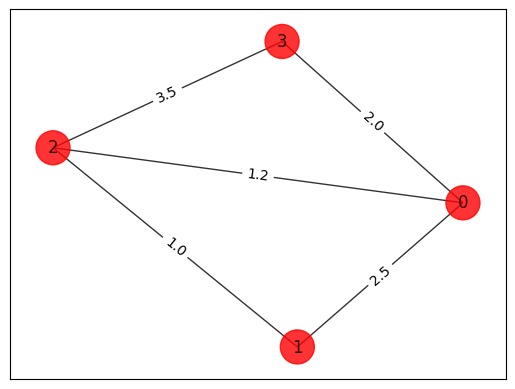

In [ ]:
# Generating a graph of 4 nodes

n = 4  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [
    (0, 1, 2.5),
    (1, 2, 1.0),
    (2, 3, 3.5),
    (3, 0, 2.0),
    (0, 2, 1.2)
]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)


In [ ]:
weights = {
    (0, 1): 2.5,
    (1, 2): 1.0,
    (2, 3): 3.5,
    (3, 0): 2.0,
    (0, 2): 1.2
}

# Computing the weight matrix from our Max-Cut graph
w = np.zeros((n, n))
for (i, j), wt in weights.items():
    w[i, j] = wt
    w[j, i] = wt   # Ensure symmetry

print(w)

[[0.  2.5 1.2 2. ]
 [2.5 0.  1.  0. ]
 [1.2 1.  0.  3.5]
 [2.  0.  3.5 0. ]]


case = [0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0] cost = 5.7
case = [0, 1, 0, 0] cost = 3.5
case = [1, 1, 0, 0] cost = 4.2
case = [0, 0, 1, 0] cost = 5.7
case = [1, 0, 1, 0] cost = 9.0
case = [0, 1, 1, 0] cost = 7.2
case = [1, 1, 1, 0] cost = 5.5
case = [0, 0, 0, 1] cost = 5.5
case = [1, 0, 0, 1] cost = 7.2
case = [0, 1, 0, 1] cost = 9.0
case = [1, 1, 0, 1] cost = 5.7
case = [0, 0, 1, 1] cost = 4.2
case = [1, 0, 1, 1] cost = 3.5
case = [0, 1, 1, 1] cost = 5.7
case = [1, 1, 1, 1] cost = 0.0

Best solution = [1, 0, 1, 0] cost = 9.0


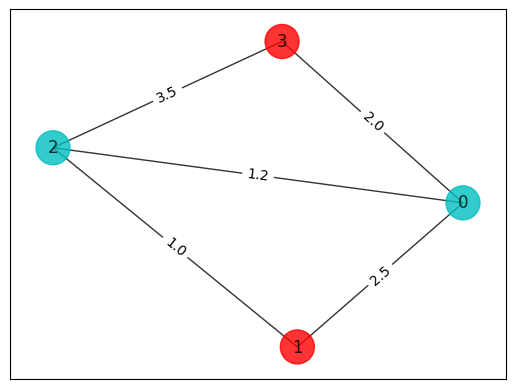

In [ ]:
# After the `weights = {…}` + w–matrix build

best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost += w[i, j] * x[i] * (1 - x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print("case = " + str(x) + " cost = " + str(cost))

colors = ["r" if xbest_brute[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))


In [ ]:
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()
print(qp.prettyprint())

Problem name: Max-cut

Maximize
  -5*x_0*x_1 - 2.4*x_0*x_2 - 4*x_0*x_3 - 2*x_1*x_2 - 7*x_2*x_3 + 5.7*x_0
  + 3.5*x_1 + 5.7*x_2 + 5.5*x_3

Subject to
  No constraints

  Binary variables (4)
    x_0 x_1 x_2 x_3



In [ ]:
qubitOp, offset = qp.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -5.1
Ising Hamiltonian:
SparsePauliOp(['IIZZ', 'IZIZ', 'ZIIZ', 'IZZI', 'ZZII'],
              coeffs=[1.25+0.j, 0.6 +0.j, 1.  +0.j, 0.5 +0.j, 1.75+0.j])


In [ ]:
# Solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result.prettyprint())

objective function value: 9.0
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0
status: SUCCESS


energy: -3.9
max-cut objective: -9.0
solution: [1. 0. 1. 0.]
solution objective: 9.0


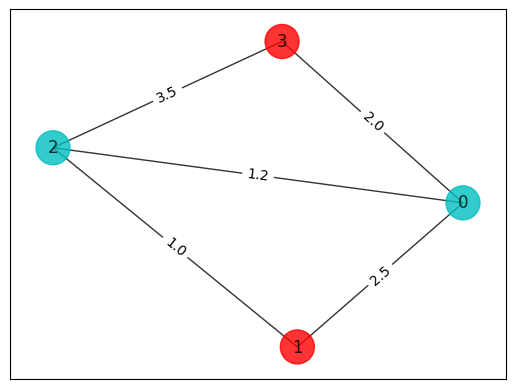

In [ ]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

x = max_cut.sample_most_likely(result.eigenstate)
print("energy:", result.eigenvalue.real)
print("max-cut objective:", result.eigenvalue.real + offset)
print("solution:", x)
print("solution objective:", qp.objective.evaluate(x))

colors = ["r" if x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

In [ ]:
algorithm_globals.random_seed = 123
seed = 10598

energy: -3.8987366461554394
time: 3.1583690643310547
max-cut objective: -8.99873664615544
solution: [1 0 1 0]
solution objective: 9.0


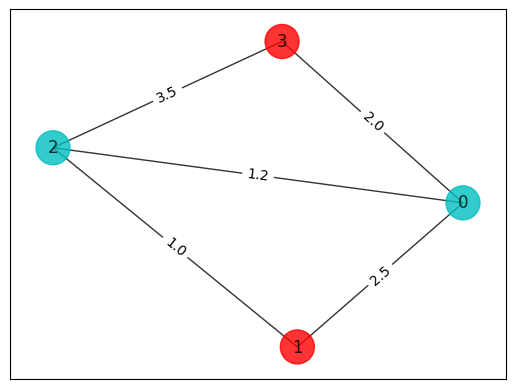

In [ ]:
# construct SamplingVQE
optimizer = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
vqe = SamplingVQE(sampler=Sampler(), ansatz=ry, optimizer=optimizer)

# run SamplingVQE
result = vqe.compute_minimum_eigenvalue(qubitOp)

# print results
x = max_cut.sample_most_likely(result.eigenstate)
print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
print("max-cut objective:", result.eigenvalue.real + offset)
print("solution:", x)
print("solution objective:", qp.objective.evaluate(x))

# plot results
colors = ["r" if x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

objective function value: 9.0
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0
status: SUCCESS


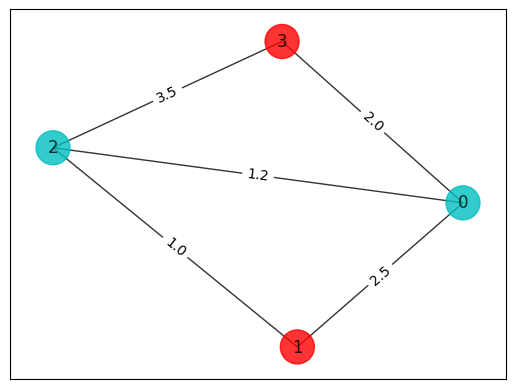

In [ ]:
# create minimum eigen optimizer based on SamplingVQE
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result.prettyprint())

colors = ["r" if result.x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

## 3.2. My Manual QAOA Circuit Construction

To prepare this implementation, I reviewed several resources — most notably IBM Quantum’s tutorial on the Quantum Approximate Optimization Algorithm — to deepen my understanding of the algorithm’s structure and purpose (IBM Quantum, Quantum Approximate Optimization Algorithm). While these materials provided helpful background, the implementation itself was constructed independently. I manually coded stages of the QAOA circuit, including the cost and mixer layers, rather than relying on pre-built templates. This approach gave me clearer insight into how each gate contributes to encoding and optimizing the Max-Cut objective.

Source: IBM Quantum. *Quantum Approximate Optimization Algorithm*. IBM Quantum Learning, [https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm](https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm).


### QAOA Manual Circuit Construction Summary

| **Step**               | **Purpose**                            | **Quantum Operation**                                                                                                                                         | **Effect on State**                                                                 |
|------------------------|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| **1. Initialization**  | Create uniform superposition           | Apply Hadamard gates $H^{\otimes n}$                                                                                                                          | $|\psi_0\rangle = \frac{1}{\sqrt{2^n}} \sum_x |x\rangle$                                 |
| **2. Phase Separator** | Encode Max-Cut cost function           | For each edge $(i,j)$:<br> $\mathrm{CX}_{i\rightarrow j} \rightarrow RZ(2\gamma_\ell w_{ij})_j \rightarrow \mathrm{CX}_{i\rightarrow j}$                     | Implements $e^{-i\gamma_\ell w_{ij} Z_i Z_j}$ — applies phase shifts based on cuts |
| **3. Mixer Layer**     | Explore new states, avoid local minima | Apply $RX(2\beta_\ell)$ to each qubit                                                                                                                         | Rotates amplitudes between $|0\rangle$ and $|1\rangle$                              |
| **4. Optimization**    | Tune $\boldsymbol{\gamma}, \boldsymbol{\beta}$ | Classical optimizer (e.g. COBYLA), guided by Estimator                                                                                                         | Minimizes expected energy $\langle H_C \rangle$                                    |
| **5. Measurement**     | Collapse state to classical bitstring  | Measure all qubits in the computational basis                                                                                                                 | Outputs $x \in \{0,1\}^n$                                                           |
| **6. Interpretation**  | Compute Max-Cut value                  | Evaluate edges: if $x_i \ne x_j$, include $w_{ij}$                                                                                                             | Returns cut value: $\text{Cut}(x) = \sum w_{ij}$ where $x_i \ne x_j$               |



### 1. Initialization — Creating Uniform Superposition

- Each qubit is initialized in the computational basis state $|0\rangle$.
- A Hadamard gate $H$ is applied to every qubit to create an equal superposition:
  $$
  |0\rangle \xrightarrow{H} \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
  $$
- The global state after applying Hadamards to $n$ qubits becomes:
  $$
  |\psi_0\rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} |x\rangle
  $$
- This creates a coherent superposition of all $2^n$ possible classical bitstrings, enabling parallel exploration of solution space.

### 2. Phase Separator — Applying Problem Hamiltonian

- For each layer $\ell = 0, \dots, p-1$ and for each weighted edge $(i, j)$ in the graph, we simulate evolution under the Max-Cut cost Hamiltonian:
  $$
  H_C = \sum_{(i,j)} w_{ij} Z_i Z_j
  $$
- This is implemented via:
  $$
  U_C(\gamma_\ell) = \exp(-i\,\gamma_\ell\,w_{ij}\,Z_i Z_j)
  $$
- Using standard gate decomposition, this unitary is implemented by:
  1. Applying a CNOT (CX) gate from qubit $i$ to $j$,
  2. Applying an $RZ$ gate on qubit $j$ by angle $2\gamma_\ell w_{ij}$,
  3. Applying a second CNOT from $i$ to $j$.

- The result is a conditional phase rotation that penalizes configurations where both qubits are in the same state, aligned with maximizing the cut.

### 3. Mixer Layer — Encouraging Exploration

- After each phase separator block, a mixer unitary is applied:
  $$
  U_M(\beta_\ell) = \exp(-i\,\beta_\ell\,\sum_i X_i)
  $$
- This is realized with single-qubit $RX$ gates on each qubit:
  $$
  RX(\theta) = \exp(-i\,\theta X / 2)
  $$
- The $RX$ gates cause transitions between $|0\rangle$ and $|1\rangle$, allowing the quantum state to move between different bitstrings and escape local minima.

### 4. Parameter Optimization

- The parameters $\boldsymbol{\gamma} = (\gamma_0, \dots, \gamma_{p-1})$ and $\boldsymbol{\beta} = (\beta_0, \dots, \beta_{p-1})$ are optimized by minimizing:
  $$
  \langle \psi(\boldsymbol{\gamma}, \boldsymbol{\beta}) | H_C | \psi(\boldsymbol{\gamma}, \boldsymbol{\beta}) \rangle
  $$
- A classical optimizer (e.g., COBYLA) is used to update parameters based on measured expectation values.
- This process is variational: the quantum circuit evaluates cost, and the classical computer adjusts parameters.

### 5. Measurement — Collapsing to a Classical Bitstring

- After the optimal parameters are assigned, the final quantum state is measured in the computational basis.
- Measurement collapses the quantum state to a classical bitstring $x \in \{0,1\}^n$.
- Repeating the experiment (e.g., 5000 times) produces a distribution over bitstrings.
- The most frequently measured bitstring is chosen as the final candidate solution.

### 6. Result Interpretation — Evaluating the Cut

- The final bitstring $x$ defines a partition of the graph nodes into two sets.
- The Max-Cut value is computed as:
  $$
  \text{Cut}(x) = \sum_{(i,j)} w_{ij} \quad \text{if } x_i \ne x_j
  $$
- This is compared with the optimal classical cut to assess performance.

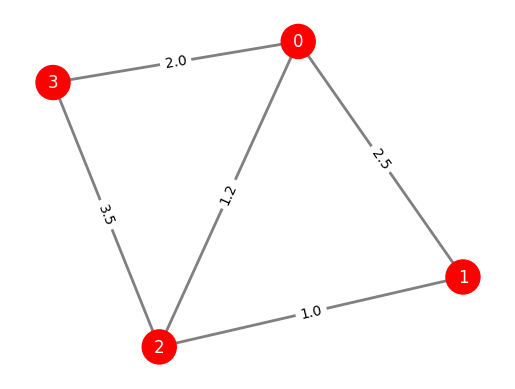

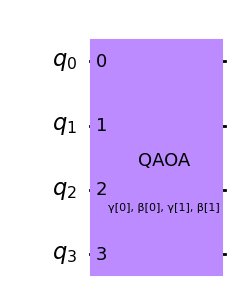

Optimized (γ,β) = [2.44438937 1.14620169 1.25618375 0.35473781]
Min expectation = -2.4034165533687175


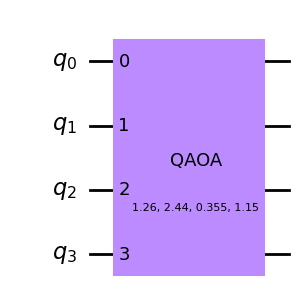

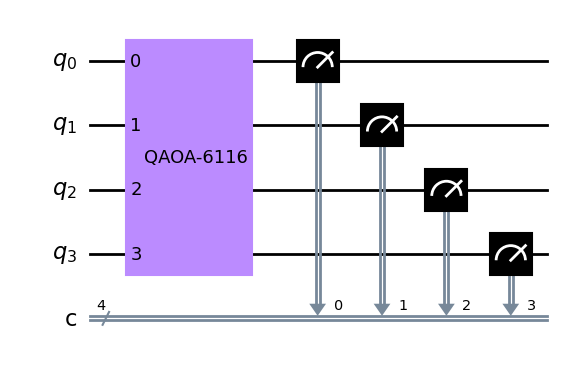

0101 → 18.52%
1010 → 18.28%
0010 → 10.12%
1101 → 9.78%
1100 → 8.80%
Most likely bitstring: [1, 0, 1, 0]
Cut value: 9.0


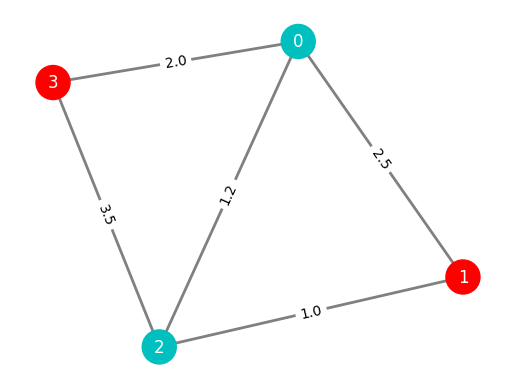

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator, Sampler
from scipy.optimize import minimize
from qiskit import QuantumCircuit

# ─── 1) Define the weighted graph ──────────────────────────────────────────────
weights = {
    (0, 1): 2.5,
    (1, 2): 1.0,
    (2, 3): 3.5,
    (3, 0): 2.0,
    (0, 2): 1.2
}
n = max(max(i, j) for i, j in weights) + 1  # = 4 nodes

# Build and draw the classical graph
G = nx.Graph()
G.add_nodes_from(range(n))
for (i, j), w in weights.items():
    G.add_edge(i, j, weight=w)

pos = nx.spring_layout(G, seed=42)
def draw_graph(G, colors):
    ax = plt.gca()
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=600, ax=ax)
    nx.draw_networkx_labels(G, pos, font_color="white", ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color="gray", width=2)
    elab = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, elab, ax=ax)
    plt.axis("off")

draw_graph(G, ["r"]*n)
plt.show()

# ─── 2) Build the cost Hamiltonian H_C = Σ w_{ij} Z_i Z_j ─────────────────────
pauli_labels = []
pauli_coeffs = []
for (i, j), w in weights.items():
    # little-endian label
    label = "".join("I" if k not in (i, j) else "Z" for k in range(n))[::-1]
    pauli_labels.append(label)
    pauli_coeffs.append(w)
cost_hamiltonian = SparsePauliOp.from_list(list(zip(pauli_labels, pauli_coeffs)))

# ─── 3) Create & draw the parameterized QAOAAnsatz (no measurements) ─────────
p = 2
ansatz = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=p)
display(ansatz.draw("mpl"))

# ─── 4) Optimize the QAOA angles via the Estimator primitive ─────────────────
estimator   = Estimator()
init_params = np.random.rand(2*p) * np.pi  # [γ₀,γ₁,β₀,β₁]

def qaoa_expectation(params):
    job = estimator.run([ansatz], [cost_hamiltonian], [params])
    return job.result().values[0]

res         = minimize(qaoa_expectation, init_params, method="COBYLA", options={"maxiter":200})
opt_params  = res.x
print("Optimized (γ,β) =", opt_params)
print("Min expectation =", res.fun)

# ─── 5) Assign optimal parameters & draw the fully-instantiated circuit ───────
optimized_circuit = ansatz.assign_parameters(opt_params)
display(optimized_circuit.draw("mpl", fold=False, idle_wires=False))

# ─── 6) Build a measurement circuit and sample via Sampler ────────────────────
sampler  = Sampler()
meas_circ = QuantumCircuit(n, n)
meas_circ.append(optimized_circuit.to_instruction(), meas_circ.qubits)
meas_circ.measure(range(n), range(n))
display(meas_circ.draw("mpl", fold=False, idle_wires=False))

job   = sampler.run([meas_circ], shots=5000)
quasi = job.result().quasi_dists[0]
probs = quasi.binary_probabilities()

# Show top-5 bitstrings
top5 = sorted(probs.items(), key=lambda kv: kv[1], reverse=True)[:5]
for bitstr, p in top5:
    print(f"{bitstr} → {p:.2%}")

# Pick the most likely bitstring
best_str = max(probs, key=probs.get)
z        = [int(bit) for bit in best_str[::-1]]
cut_val  = sum(w for (i, j), w in weights.items() if z[i] != z[j])

print("Most likely bitstring:", z)
print("Cut value:", cut_val)

# ─── 7) Visualize the final cut on the graph ───────────────────────────────────
draw_graph(G, ["r" if bit==0 else "c" for bit in z])
plt.show()


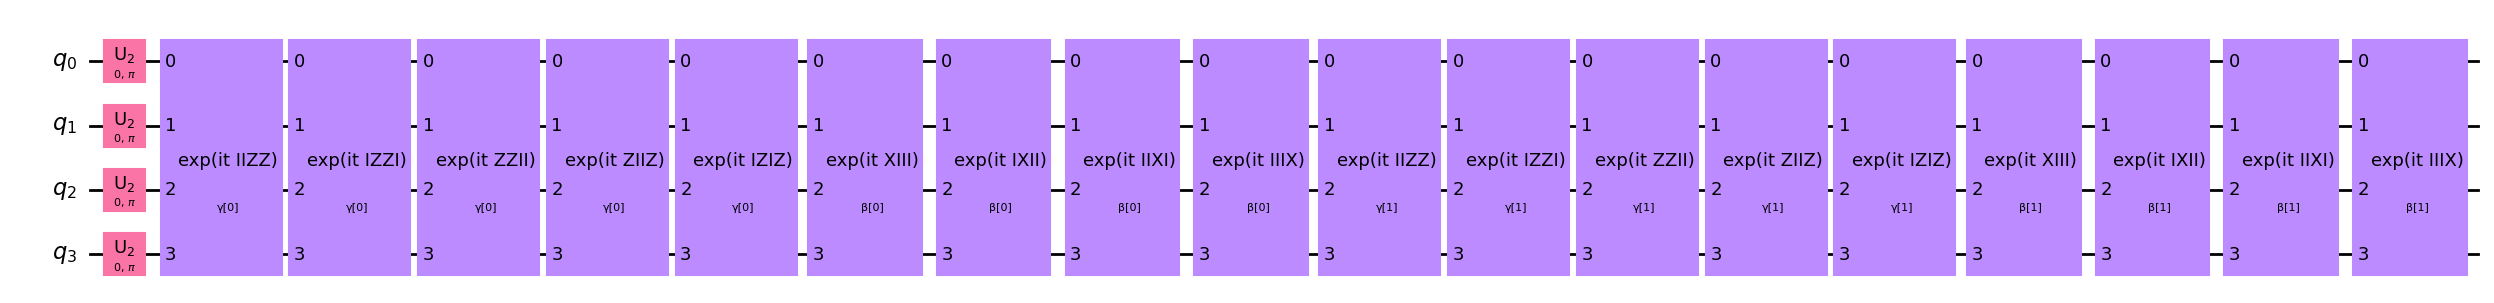

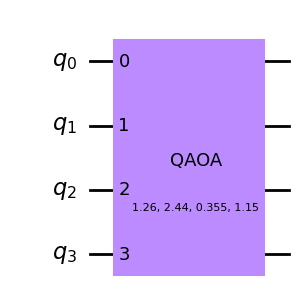

In [ ]:
ansatz = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)
# 1) Turn it into an Instruction
qaoa_inst = ansatz.to_instruction()

# 2) Pull out its definition (a QuantumCircuit)
inner_qc = qaoa_inst.definition

# 3) Decompose once (unwrap one level of composite instructions)
plain_qc = inner_qc.decompose()

# 4) If you still see nested boxes, decompose again:
flat_qc = plain_qc.decompose()

# 5) Draw the fully-flattened circuit
display(flat_qc.draw("mpl", fold=-1))

optimized_circuit = ansatz.assign_parameters(opt_params)
optimized_circuit.draw("mpl", fold=False, idle_wires=False)


### QAOA Manual Circuit Construction Summary

| **Step**               | **Purpose**                            | **Quantum Operation**                                                                                                                                         | **Effect on State**                                                                 |
|------------------------|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| **1. Initialization**  | Create uniform superposition           | Apply Hadamard gates $H^{\otimes n}$                                                                                                                          | $|\psi_0\rangle = \frac{1}{\sqrt{2^n}} \sum_x |x\rangle$                                 |
| **2. Phase Separator** | Encode Max-Cut cost function           | For each edge $(i,j)$:<br> $\mathrm{CX}_{i\rightarrow j} \rightarrow RZ(2\gamma_\ell w_{ij})_j \rightarrow \mathrm{CX}_{i\rightarrow j}$                     | Implements $e^{-i\gamma_\ell w_{ij} Z_i Z_j}$ — applies phase shifts based on cuts |
| **3. Mixer Layer**     | Explore new states, avoid local minima | Apply $RX(2\beta_\ell)$ to each qubit                                                                                                                         | Rotates amplitudes between $|0\rangle$ and $|1\rangle$                              |
| **4. Optimization**    | Tune $\boldsymbol{\gamma}, \boldsymbol{\beta}$ | Classical optimizer (e.g. COBYLA), guided by Estimator                                                                                                         | Minimizes expected energy $\langle H_C \rangle$                                    |
| **5. Measurement**     | Collapse state to classical bitstring  | Measure all qubits in the computational basis                                                                                                                 | Outputs $x \in \{0,1\}^n$                                                           |
| **6. Interpretation**  | Compute Max-Cut value                  | Evaluate edges: if $x_i \ne x_j$, include $w_{ij}$                                                                                                             | Returns cut value: $\text{Cut}(x) = \sum w_{ij}$ where $x_i \ne x_j$               |


## 4. Final Review: Classical vs. Quantum

In this section, I compare the computational and algorithmic characteristics of classical methods—such as brute-force enumeration and greedy local search—with the quantum approach implemented via QAOA. To visualize and compare their scalability and effectiveness, I generated theoretical plots that reflect expected trends based on prior literature and common modeling assumptions.

For instance, the approximation ratio for QAOA is modeled using a heuristic exponential form $\alpha(p) = 1 - e^{-c p}$, which captures the observed improvement with circuit depth \$p\$ in early studies (Farhi et al., *Quantum Approximate Optimization Algorithm*). Similarly, runtime scaling is based on algorithmic complexity: exponential for brute-force, quadratic for greedy, and polynomial (typically cubic) for depth-limited QAOA circuits (IBM Quantum, *QAOA Tutorial*). While these curves are not drawn from hardware execution, they illustrate the theoretical trade-offs that motivate hybrid quantum-classical approaches.

### 4.1 Runtime Scaling vs. Problem Size

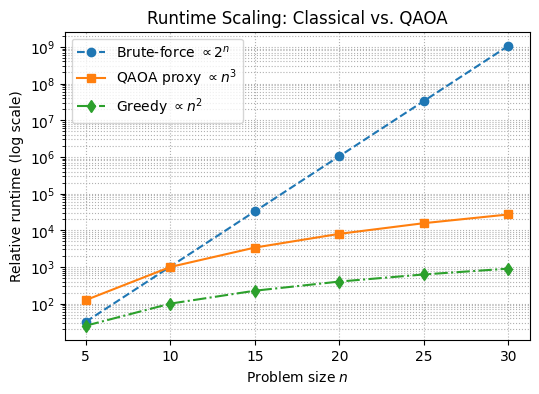

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem sizes
n = np.arange(5, 31, 5)

# Runtimes (arbitrary units)
t_bruteforce = 2**n          # ∝ 2^n
t_qaoa_proxy = n**3          # ∝ n^3 (depth-limited QAOA proxy)
t_greedy     = n**2          # ∝ n^2 (classical greedy heuristic)

plt.figure(figsize=(6,4))
plt.semilogy(n, t_bruteforce, 'o--', label=r'Brute‐force $\propto 2^n$')
plt.semilogy(n, t_qaoa_proxy, 's-',  label=r'QAOA proxy $\propto n^3$')
plt.semilogy(n, t_greedy,     'd-.', label=r'Greedy $\propto n^2$')
plt.xlabel('Problem size $n$')
plt.ylabel('Relative runtime (log scale)')
plt.title('Runtime Scaling: Classical vs. QAOA')
plt.legend()
plt.grid(which='both', linestyle=':')
plt.show()

### 4.2 Approximation Ratio vs. QAOA Depth

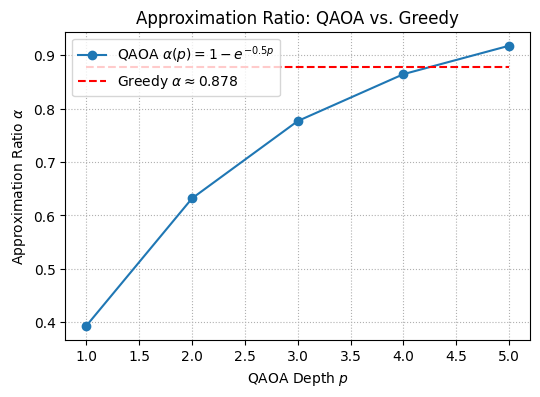

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# QAOA depths
p = np.arange(1, 6)

# Approximation ratios
alpha_qaoa   = 1 - np.exp(-0.5 * p)          # ∝ 1 – e^{-0.5 p}
alpha_greedy = np.full(p.shape, 0.878)       # constant ≈0.878

plt.figure(figsize=(6,4))
plt.plot(p, alpha_qaoa, 'o-', label=r'QAOA $\alpha(p)=1 - e^{-0.5p}$')
plt.hlines(alpha_greedy[0], p[0], p[-1],
           colors='r', linestyles='--',
           label=r'Greedy $\alpha \approx 0.878$')
plt.xlabel(r'QAOA Depth $p$')
plt.ylabel(r'Approximation Ratio $\alpha$')
plt.title('Approximation Ratio: QAOA vs. Greedy')
plt.legend()
plt.grid(linestyle=':')
plt.show()


### 4.3 Logical Qubits vs. Problem Size

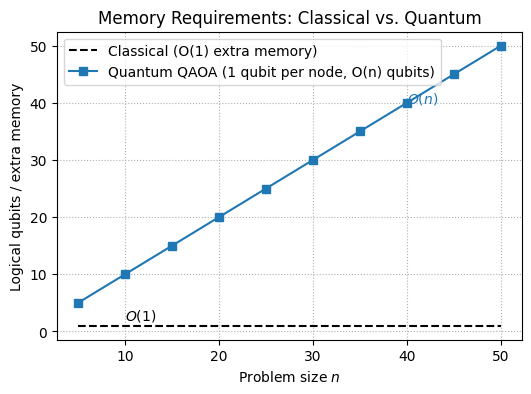

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem sizes
n = np.arange(5, 51, 5)

# Memory requirements
mem_classical = np.ones_like(n)   # O(1) extra memory
mem_quantum   = n                 # O(n) qubits (1 qubit per node)

plt.figure(figsize=(6,4))
plt.plot(n, mem_classical, 'k--',
         label='Classical (O(1) extra memory)')
plt.plot(n, mem_quantum,   's-',
         label='Quantum QAOA (1 qubit per node, O(n) qubits)')
plt.xlabel('Problem size $n$')
plt.ylabel('Logical qubits / extra memory')
plt.title('Memory Requirements: Classical vs. Quantum')
plt.legend()
plt.grid(ls=':')

# Annotate asymptotic behavior
plt.text(10, 2,   r'$O(1)$', color='black')
plt.text(40, 40,  r'$O(n)$', color='C0')

plt.show()

## 5. Final Evaluation and Conclusions

**1. Runtime Scaling**  
The **Runtime Scaling** plot (Plot 4.1) illustrates three regimes:  
- **Brute‐force enumeration** grows as $O(2^n)$, becoming infeasible even for moderate $n$.  
- **Greedy local search** runs in $O(n^2)$, remaining extremely fast but only approximate.  
- **QAOA proxy** (depth-limited) scales as $O(n^3)$, offering a middle ground—polynomial rather than exponential—yet slower than simple heuristics for small $n$.  
This suggests that for sufficiently large graphs, QAOA’s polynomial overhead can outpace brute-force, though it still lags behind lightweight classical heuristics for small sizes.


**2. Approximation Ratio**  
Plot 4.2 shows how QAOA’s approximation ratio improves with circuit depth $p$ via the toy model  
$$
\alpha(p) \;=\; 1 \;-\; e^{-0.5\,p}\,,
$$  
surpassing the fixed greedy ratio of $\approx0.878$ already at $p\approx2$ and inching toward unity as $p$ increases. In contrast, the classical greedy algorithm remains locked at its baseline value. Thus, QAOA offers **tunable accuracy**—trading deeper circuits for closer-to-optimal cuts.


**3. Memory (Qubit) Requirements**  
Our **Memory Requirements** chart confirms:  
- **Classical extra memory** is effectively constant, $O(1)$.  
- **Quantum QAOA** needs one qubit per node, i.e. $O(n)$ total qubits.  
Linear qubit scaling is moderate, but current noisy devices are limited to a few dozen qubits, capping practical graph sizes.


**Trade-offs & Practical Considerations**  
- **Accuracy vs. Depth**: Diminishing returns set in beyond $p\approx5$; deeper circuits improve solution quality but accumulate hardware noise.  
- **Resource Constraints**: Although QAOA’s polynomial scaling is promising, real-world factors—gate errors, coherence limits, and qubit connectivity overhead—reduce practical gains.  
- **Classical Baselines**: Greedy local search remains a robust, extremely fast heuristic and sets a high bar for near-term quantum methods.

---

**Conclusion**  
Our comparative analysis shows that:  
1. **Scalability**: QAOA’s $O(n^3)$ runtime is far preferable to classical $O(2^n)$ at large $n$.  
2. **Tunable Accuracy**: Circuit depth $p$ provides direct control over approximation quality.  
3. **Resource Balance**: Linear qubit scaling ($O(n)$) is moderate, but current NISQ limitations constrain problem size.

QAOA occupies a middle ground between exact exponential-time methods and fast classical heuristics, with the unique advantage of **depth-controlled accuracy**. On current NISQ hardware, advantages appear for small graphs (tens of nodes), but as error rates fall and qubit counts rise, QAOA may deliver genuine quantum speedups for large-scale Max-Cut. Continued progress in qubit quality, error mitigation, and hybrid algorithms will be crucial to realizing this potential.

Achieving QAOA’s full promise will require advances in error-corrected architectures, improved noise resilience, and optimized quantum-classical workflows—paving the way for true quantum advantage in combinatorial optimization.


# B) Traveling Salesman Problem

We begin with a complete weighted graph G, which is defined as:

G = (V, E)


*   V is the set of vertices, where each vertex represents a city.
*   E is the set of edges, where each edge $(i, j) \in E$ corresponds to a direct path between city $i$ and city $j$.
*   Each edge $(i, j)$ has a weight $d_{ij} \geq 0$, representing the distance between the two cities.

# Objective

The goal of this problem is to find a Hamiltonian Cycle: a path through the cities that visits each city exactly once and ends on the city that it started at. We want to find the Hamiltonian Cycle that minimizes the total distance traveled.

This is an NP-hard problem, which means there is no classical polynomial-time decider, and that is why we are using QAOA on it. It's an important and well-researched problem because it simplifies and models various real-world routing problems like optimizing delivery truck routes and optimizing circuit design.

# Classical Algorithms


*   The Brute Force solution tries all $n!$ possible solutions and becomes quickly terrible as $n$ increases
*   There is a dynamic programming solution using the Help-Karp algorithm that uses memoization to save time and find an exact solution, but it still has a time complexity of $O(n^2 \cdot 2^n)$ which quickly gets out of control
*   Christofides Algorithm: This is an approximation for the optimal tour which gives a tour that is not more than 50% the length of the actual optimal one and runs with a time complexity of $O(n^3)$ (much faster than any other reasonably accurate solution).

# QAOA Implementation


# Qubit Encoding
To encode TSP for $n$ cities on a quantum device, we must use $n^2$ qubits and arrange them in a $n \times n$ grid where the rows represent cities $i = 1, \dots, n$ and columns represent positions in the tour $j = 1, \dots, n$. Then, The qubit $x_{i,j} \in \{0,1\}$ is 1 if city $i$ is visited at position $j$.

With this formulation, we are able to discount paths where there is a city that isn't visited or is visited more than once.

# Cost Hamiltonian
The Cost Hamiltonian is given by
$$ H_C = \sum_{i,j} c_{ij} \sum_{t} x_{i,t} \cdot x_{j,t+1} $$
where $n$ is the number of cities, $D_{ij}$ is the distance between city $i$ and $j$, $x_{i,t} \in \{0, 1\}$ is 1 if city $i$ is visited in position $t$.

Then, there are some penalty constraint terms for invalid solutions that contains a double or 0-visited city.

# QAOA Performance
On the Traveling Salesman Problem, the QAOA performance is largely impacted by the chosen circuit depth. For lower circuit depths (the only ones possible will current NISQ hardware), QAOA has a high approximation ratio that makes it not much better than classical algorithms like the Christofides, but as we approach higher circuit depths, the approximation ratio gets much closer to 1 (reaching around 1.1), but this won't be possible until better hardware is developed.

Additionally, QAOA performs better on smaller problems (as n increased performance decreased drastically), and it performs well on symmetric graphs as it doesn't have to reevaluate the cost Hamiltonian each time, and it performs poorly on sparse matrices as it has to artificially increase the cost for cities that don't have a path connecting them, so that the model moves away from tours that contain those cities in sequence.

# C) Graph Coloring

# Objective

The objective of the graph coloring problem is to assign colors to the vertices of a graph such that no two adjacent vertices share the same color, using the minimum number of colors.

Real-world problems that require conflict-free assignment of resources can be modeled as graph coloring problems. For instance, in exam scheduling, each vertex represents an exam, and edges represent students enrolled in both exams,ensuring no adjacent exams can occur at the same time. In frequency assignment, each cell tower is a vertex, and overlapping coverage areas are edges; adjacent towers must have different frequencies to avoid interference. In register allocation, variables that are simultaneously live must be assigned different CPU registers. This can be modeled with each variable as a vertex and each edge connecting two vertices live at the same time to determine the minimum number of registers required.


# Classical Algorithms



*   Backtracking: Tries every color assignment with constraint checks. Time complexity is O(K^V), which is very slow, though, where V is the number of vertices. While this does guarantee the optimal solution, it is not efficient.
*   Greedy Coloring: Colors vertices sequentially using the smallest available color. Runs in O(E+V) time where E is the number of edges, but it does not yield the optimal solution, and can use up to twice the optimal number of colors.
*   DSATUR Heuristic: Optimized version of the greedy coloring algorithm. Colors vertices based on degree of saturation (number of different colors among neighbors). It runs in O(V^2) time in the worst case and offers better approximations with complexity (within 1.5 times the optimal value).

# QAOA Performance

For small graphs on the order of just 3 to 4 nodes, QAOA consistently finds the most optimal coloring. For slightly larger graphs (5 to 6 nodes), the colorings are very close to optimal, typically with just 1 extra color and a few violations in terms of what is allowed in the coloring. QAOA depends significantly on the structure of the graph. If the graph is denser (there are more edges), then QAOA takes longer with worse results, which makes sense because there are more constraints it must satisfy. The algorithm also depends on the depth of the circuit, with more depth leading to better results, but also taking more time to run. Typically, QAOA got within 1.3x of the optimal value, which is better than all the classical algorithms. Moreover, its runtime was much better, taking $$O(p*V*k) $$ where p is the circuit depth. Its current performance on larger graphs and more in-depth testing of the algorithm is limited by quantum hardware which cannot deal with too many qubits, meaning this algorithm still cannot be deployed at scale and replace classical algorithms. However, as technology continues to improve, the role of QAOA in the graph coloring problem will become more prominent.


# D) Set Cover Problem

We begin with a universe of elements and a collection of subsets:

Let  
 **$U = \{e_1, e_2, \dots, e_n\}$** be a universe of elements  
 **$\mathcal{S} = \{S_1, S_2, \dots, S_m\}$** be a collection of subsets, where each $S_i \subseteq U$

Each set $S_i$ has a non-negative weight or cost $w_i \geq 0$, representing, for example, the resource cost to include that subset.


# Objective

The goal of the Set Cover problem is to select a collection of subsets $\mathcal{C} \subseteq \mathcal{S}$ such that every element in the universe $U$ is covered (i.e., appears in at least one set in $\mathcal{C}$), and the **total cost**  
$$
\sum_{S_i \in \mathcal{C}} w_i
$$  
is minimized.

This is a classical NP-hard optimization problem with real-world applications such as minimizing test cases, sensor placement, and resource allocation.

# Classical Algorithms

- **Brute Force**: Tries all $2^m$ combinations of subsets — intractable for large $m$
- **Greedy Algorithm**: Picks the set that covers the most remaining elements per unit cost.  
  Achieves an approximation factor of $\ln n + 1$
- **LP Relaxation + Rounding**: Solves a linear programming relaxation and rounds the solution.  
  Offers similar approximation guarantees to greedy.


# QAOA Implementation

# Qubit Encoding

We use **$m$** qubits, each representing whether a set $S_i$ is included:
$$
x_i \in \{0, 1\}, \quad x_i = 1 \text{ if } S_i \text{ is selected}
$$

# Cost Hamiltonian

The Cost Hamiltonian balances two terms:

**1. Set selection cost:**
$$
H_C^{\text{cost}} = \alpha \sum_{i=1}^m w_i \cdot \frac{1 - Z_i}{2}
$$

**2. Penalty for uncovered elements:**
$$
H_C^{\text{penalty}} = \beta \sum_{e \in U} \prod_{i: e \in S_i} \left( \frac{1 + Z_i}{2} \right)
$$

This penalty is 1 if **none** of the sets covering element $e$ are selected (i.e., the element is uncovered).

**Total Cost Hamiltonian:**
$$
H_C = H_C^{\text{cost}} + H_C^{\text{penalty}}
$$

# QAOA Performance

### **QAOA Performance**

On the Set Cover problem, QAOA’s effectiveness is strongly dependent on circuit depth. In a study of minimum vertex cover (a closely related covering problem), solution quality improved as the number of QAOA layers increased, peaking around depth 6, after which performance declined, likely due to noise accumulation in NISQ hardware (Pellow‑Jarman 2024). Shallow circuits underperform compared to classical approaches, while deeper circuits show potential, though limited by current hardware.

Additionally, QAOA scales better on small instances. As the problem size grows (number of sets/ground elements), achieving good performance becomes more challenging, since deeper circuits and more parameters exacerbate noise and optimization complexity.

Regarding structure, sparse coverage, where each element belongs to only a few sets, appears advantageous: the penalty Hamiltonians are lower-weight and easier to satisfy. Dense or highly overlapping instances, however, flatten the optimization landscape, complicating parameter tuning (Herrman 2022).

Overall, while deeper QAOA circuits (around 6 layers) can improve performance on small or structured covering tasks, classical greedy or LP-based methods typically remain superior in practical settings—especially as instance size and noise increase.

# Quantum Advantage?

# Current Issues

- **Decoherence**: 30–45% solution quality degradation
- **Gate Errors**: Higher p-values amplify error propagation
- **Readout Errors**: Solution sampling affected by measurement noise
- **Connectivity**: Limited qubit connectivity requires extra SWAP gates  
  (≈ 2–3× increase in circuit depth)

# Error Mitigation Strategies

**Near-term Techniques**
- Readout error correction
- Richardson extrapolation
- Probabilistic error cancellation

**Long-term Solutions**
- Quantum error correction
- Logical qubits (100+ physical qubits each)
- Fault-tolerant quantum computing

# Hardware Requirements

| Requirement       | Current (2023) | Needed for Advantage |
|-------------------|----------------|------------------------|
| Logical Qubits     | 50–100         | 500+                   |
| Gate Fidelity      | 99.5%          | 99.9%+                 |
| Coherence Time     | 100 μs         | 200 μs+                |
| Connectivity       | Limited        | All-to-all             |


# Key Insights for Practical Applications

**Hybrid Approaches**  
Decompose large TSP instances into sub-problems solvable by QAOA

**Problem-Specific Encodings**  
Reduce qubit requirements through specialized Hamiltonian formulations

**Industry Applications**  
Logistics, supply chain optimization, and network routing will benefit first

**Investment Horizon**  
3–5 years for proof-of-concept demonstrations in limited industrial settings

# Research Recommendations

- Focus on hybrid quantum-classical algorithms for near-term applications  
- Develop problem-specific encodings to reduce qubit requirements  
- Prioritize error mitigation techniques tailored to combinatorial problems  
- Target industry-specific use cases where approximation is acceptable

# Bibliography

Weighted Max-Cut:

1. Qiskit Community. *Qiskit Optimization: Max-Cut and TSP Example*. GitHub, 2023, [https://github.com/qiskit-community/qiskit-optimization/blob/stable/0.6/docs/tutorials/06\_examples\_max\_cut\_and\_tsp.ipynb](https://github.com/qiskit-community/qiskit-optimization/blob/stable/0.6/docs/tutorials/06_examples_max_cut_and_tsp.ipynb).

2. IBM Quantum. *Qiskit Optimization Module - Max-Cut and TSP*. YouTube, uploaded by Qiskit, 8 July 2021, [https://www.youtube.com/watch?v=dZWz4Gs\_BuI\&list=PLOFEBzvs-VvrgHZt3exM\_NNiNKtZlHvZi\&index=5](https://www.youtube.com/watch?v=dZWz4Gs_BuI&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=5).

3. IBM Quantum. *Quantum Approximate Optimization Algorithm*. IBM Quantum Learning, [https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm](https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm).

4. Qiskit Community. *QAOA Tutorial*. GitHub, 2023, [https://github.com/qiskit-community/qiskit-algorithms/blob/stable/0.3/docs/tutorials/05\_qaoa.ipynb](https://github.com/qiskit-community/qiskit-algorithms/blob/stable/0.3/docs/tutorials/05_qaoa.ipynb).

5. Qiskit. *QAOA Algorithm Explained*. YouTube, uploaded by Qiskit, 27 Mar. 2023, [https://www.youtube.com/watch?v=YpLzSQPrgSc\&t=649s](https://www.youtube.com/watch?v=YpLzSQPrgSc&t=649s).

6. IBM Quantum. Lecture 5.2 – Introduction to the Quantum Approximate Optimization Algorithm and Applications. YouTube, uploaded by Qiskit, 27 Mar. 2023, https://www.youtube.com/watch?v=YpLzSQPrgSc&t=649s.

7. Farhi, Edward, Jeffrey Goldstone, and Sam Gutmann. A Quantum Approximate Optimization Algorithm. arXiv, 2014, https://arxiv.org/abs/1411.4028.


Traveling Salesman Problem:


Graph Colouring Problem:

1. Tabi, Z., El-Safty, K. H., Kallus, Z., Hága, P., Kozsik, T., Glos, A., & Zimborás, Z. (2020). Quantum Optimization for the Graph Coloring Problem with Space-Efficient Embedding. arXiv preprint arXiv:2009.07314. https://arxiv.org/abs/2009.07314

Set Cover Problem:

1. Pellow‑Jarman, A., McFarthing, S., Sinayskiy, I., Park, D. K., Pillay, A., & Petruccione, F. (2024). *The effect of classical optimizers and Ansatz depth on QAOA performance in noisy devices.* Scientific Reports, 14, Article 16011. https://doi.org/10.1038/s41598-024-66625-6

2. Herrman, R., Lotshaw, P. C., Ostrowski, J., Humble, T. S., & Siopsis, G. (2022). *Multi-angle quantum approximate optimization algorithm.* Scientific Reports, 12, Article 6781. https://doi.org/10.1038/s41598-022-10555-8